## 농산물 가격 예측 AI 경진대회 train EDA

### 0. 패키지 & 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
train = pd.read_csv('public_data/train.csv')
train.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


### 1. 결측값 확인 및 데이터 탐색

In [4]:
train.dtypes

date               object
요일                 object
배추_거래량(kg)        float64
배추_가격(원/kg)       float64
무_거래량(kg)         float64
무_가격(원/kg)        float64
양파_거래량(kg)        float64
양파_가격(원/kg)       float64
건고추_거래량(kg)       float64
건고추_가격(원/kg)      float64
마늘_거래량(kg)        float64
마늘_가격(원/kg)       float64
대파_거래량(kg)        float64
대파_가격(원/kg)       float64
얼갈이배추_거래량(kg)     float64
얼갈이배추_가격(원/kg)    float64
양배추_거래량(kg)       float64
양배추_가격(원/kg)      float64
깻잎_거래량(kg)        float64
깻잎_가격(원/kg)       float64
시금치_거래량(kg)       float64
시금치_가격(원/kg)      float64
미나리_거래량(kg)       float64
미나리_가격(원/kg)      float64
당근_거래량(kg)        float64
당근_가격(원/kg)       float64
파프리카_거래량(kg)      float64
파프리카_가격(원/kg)     float64
새송이_거래량(kg)       float64
새송이_가격(원/kg)      float64
팽이버섯_거래량(kg)      float64
팽이버섯_가격(원/kg)     float64
토마토_거래량(kg)       float64
토마토_가격(원/kg)      float64
청상추_거래량(kg)       float64
청상추_가격(원/kg)      float64
백다다기_거래량(kg)      float64
백다다기_가격(원/kg)     float64
애호박_거래량(kg) 

In [5]:
train.isnull().sum()

date              0
요일                0
배추_거래량(kg)        0
배추_가격(원/kg)       0
무_거래량(kg)         0
무_가격(원/kg)        0
양파_거래량(kg)        0
양파_가격(원/kg)       0
건고추_거래량(kg)       0
건고추_가격(원/kg)      0
마늘_거래량(kg)        0
마늘_가격(원/kg)       0
대파_거래량(kg)        0
대파_가격(원/kg)       0
얼갈이배추_거래량(kg)     0
얼갈이배추_가격(원/kg)    0
양배추_거래량(kg)       0
양배추_가격(원/kg)      0
깻잎_거래량(kg)        0
깻잎_가격(원/kg)       0
시금치_거래량(kg)       0
시금치_가격(원/kg)      0
미나리_거래량(kg)       0
미나리_가격(원/kg)      0
당근_거래량(kg)        0
당근_가격(원/kg)       0
파프리카_거래량(kg)      0
파프리카_가격(원/kg)     0
새송이_거래량(kg)       0
새송이_가격(원/kg)      0
팽이버섯_거래량(kg)      0
팽이버섯_가격(원/kg)     0
토마토_거래량(kg)       0
토마토_가격(원/kg)      0
청상추_거래량(kg)       0
청상추_가격(원/kg)      0
백다다기_거래량(kg)      0
백다다기_가격(원/kg)     0
애호박_거래량(kg)       0
애호박_가격(원/kg)      0
캠벨얼리_거래량(kg)      0
캠벨얼리_가격(원/kg)     0
샤인마스캇_거래량(kg)     0
샤인마스캇_가격(원/kg)    0
dtype: int64

### 2. train data EDA

### 거래량과 가격 분리
#### 거래량 EDA

In [6]:
train['year'] = train['date'].str[:4]
train['month'] = train['date'].str[5:7]
train['day'] = train['date'].str[8:]
train.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),year,month,day
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,01,01
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0,2016,01,02
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,01,03
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0,2016,01,04
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0,2016,01,05


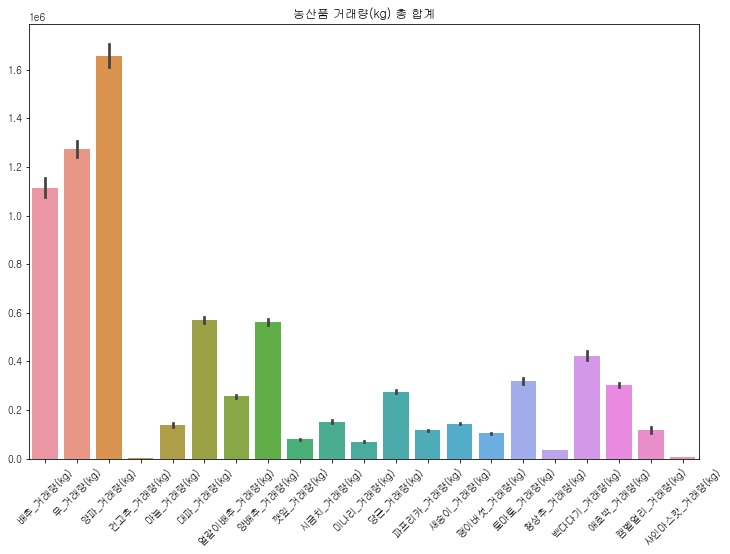

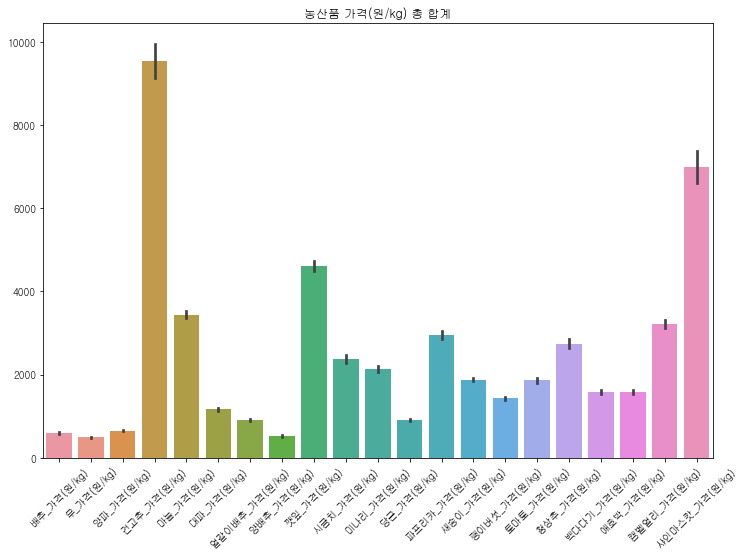

In [7]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=train.iloc[:,2::2])
plt.xticks(rotation=45)
plt.title('농산품 거래량(kg) 총 합계')
plt.show()

fig = plt.figure(figsize=(12,8))
sns.barplot(data=train.iloc[:,1::2])
plt.xticks(rotation=45)
plt.title('농산품 가격(원/kg) 총 합계')
plt.show()

In [8]:
#거래량과 가격 분리
#거래량
train_trading = train.iloc[:,2::2]
train_trading['year'] = train['date'].str[:4]
train_trading['month'] = train['date'].str[5:7]
train_trading['day'] = train['date'].str[8:]
train_trading['dow'] = train['요일']
train_trading.head()

,배추_거래량(kg),무_거래량(kg),양파_거래량(kg),건고추_거래량(kg),마늘_거래량(kg),대파_거래량(kg),얼갈이배추_거래량(kg),양배추_거래량(kg),깻잎_거래량(kg),시금치_거래량(kg),...,토마토_거래량(kg),청상추_거래량(kg),백다다기_거래량(kg),애호박_거래량(kg),캠벨얼리_거래량(kg),샤인마스캇_거래량(kg),year,day,month,dow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016,01,01,금요일
1,80860.0,80272.0,122787.5,3.0,15019.0,92334.0,6359.0,40028.0,4374.9,16550.5,...,30950.0,5125.0,434.0,19159.0,880.0,0.0,2016,02,01,토요일
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016,03,01,일요일
3,1422742.5,1699653.7,2315079.0,699.0,141638.0,994328.1,262615.5,1074699.1,122613.5,427435.1,...,291057.0,38525.5,500702.0,620539.0,2703.8,0.0,2016,04,01,월요일
4,1167241.0,1423482.3,2092960.1,1112.6,126207.8,787716.0,221850.5,825681.9,79055.9,334636.8,...,194626.5,32615.0,147638.0,231958.0,8810.0,0.0,2016,05,01,화요일


C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2427456875.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


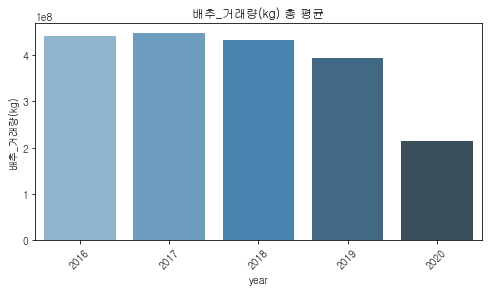

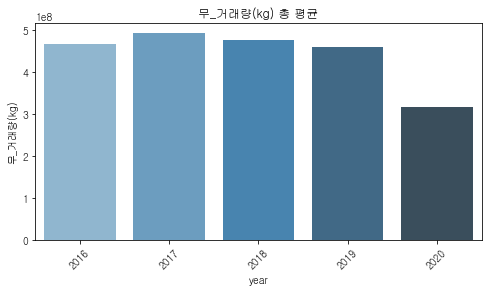

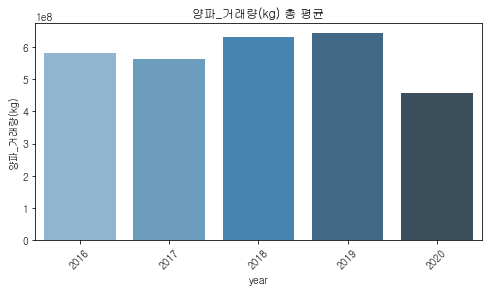

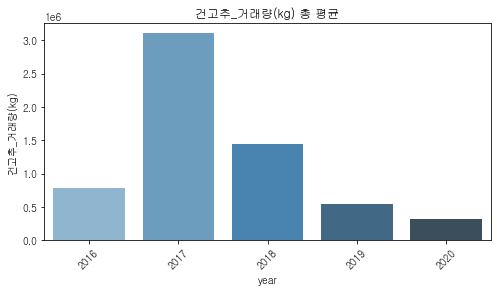

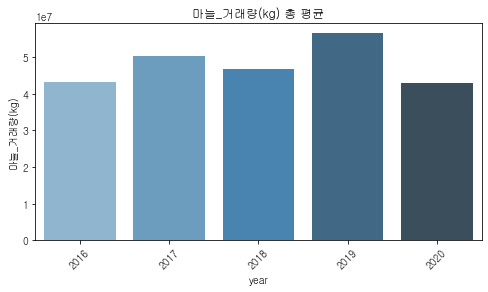

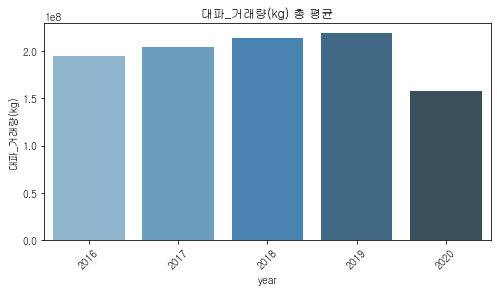

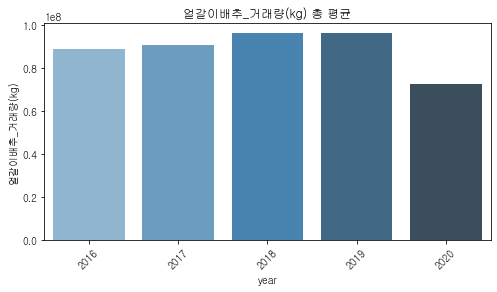

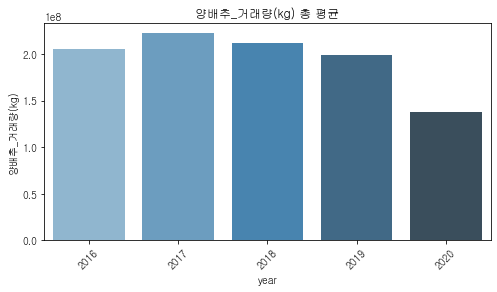

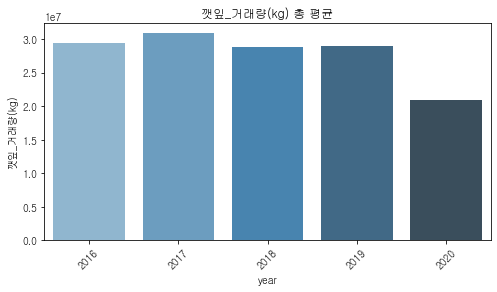

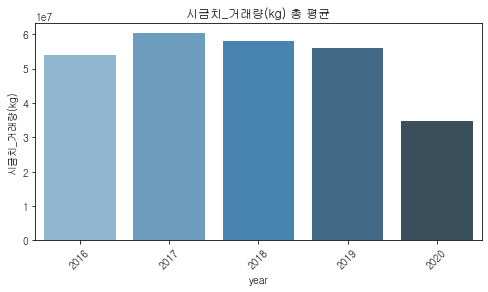

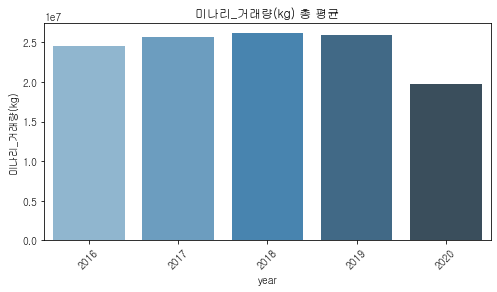

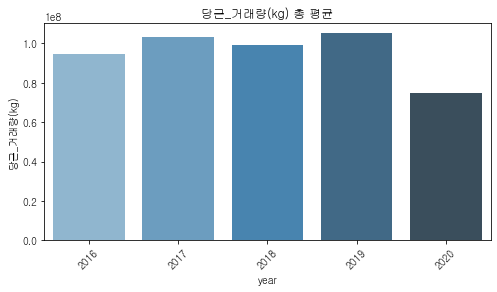

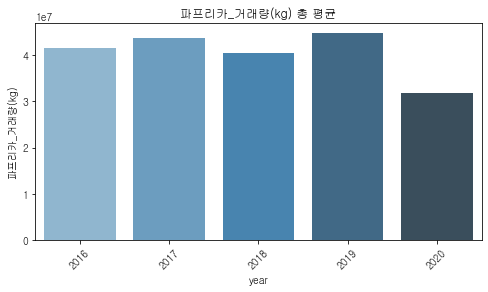

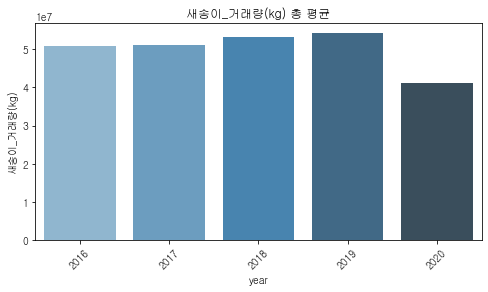

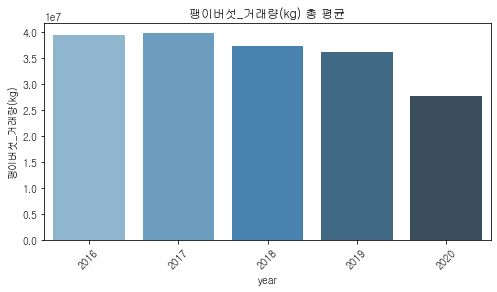

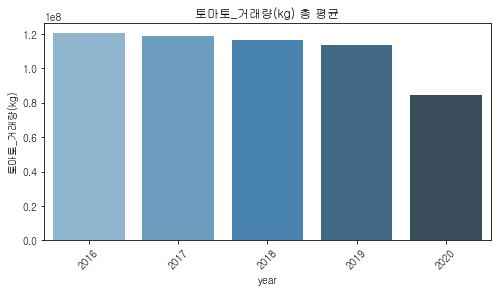

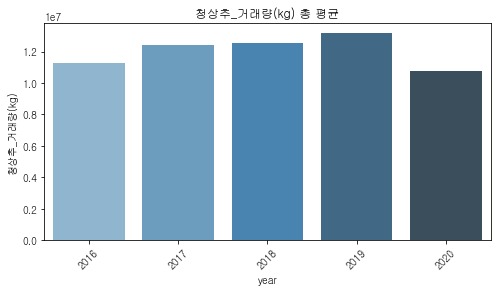

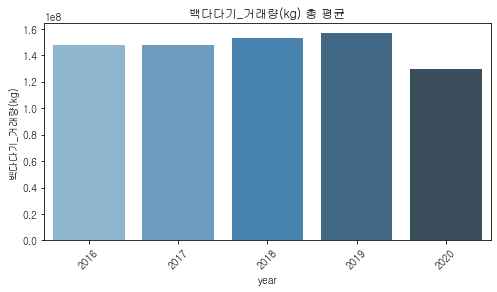

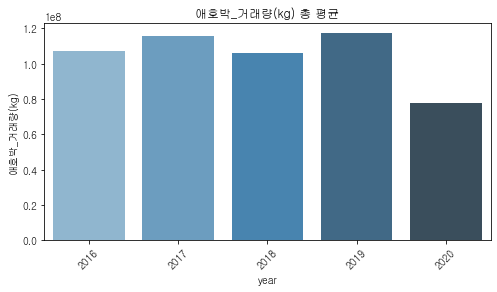

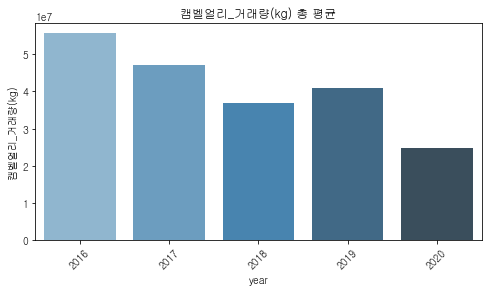

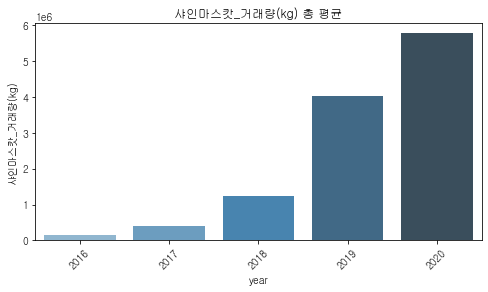

In [9]:
#거래량 합 연간 EDA

trading_sum = train_trading.groupby(['year']).sum()

for i in trading_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = trading_sum.index, y='%s'%i, data=trading_sum ,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 총 평균'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2639236109.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


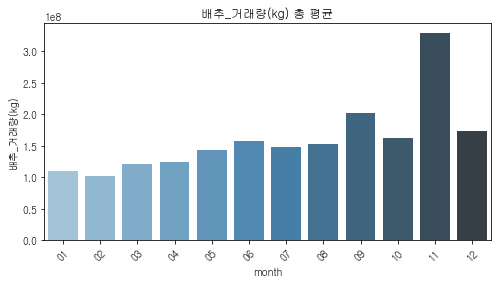

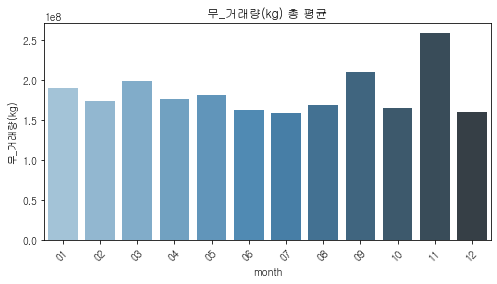

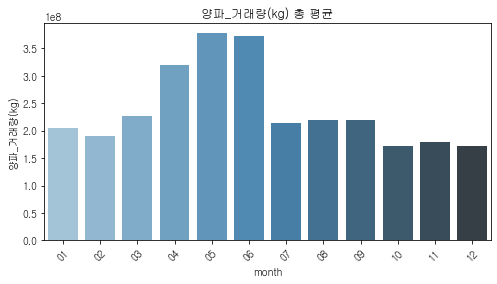

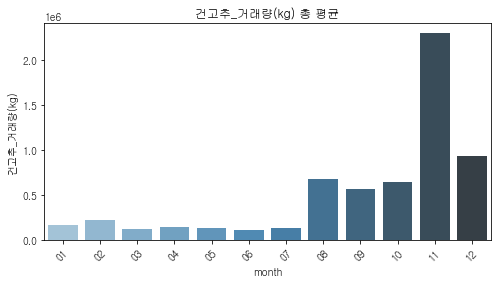

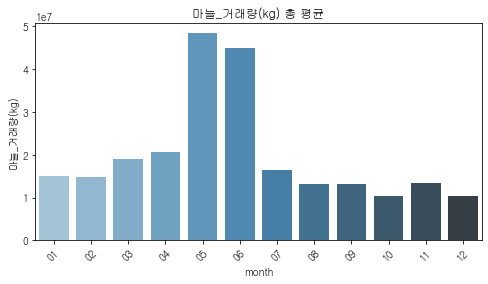

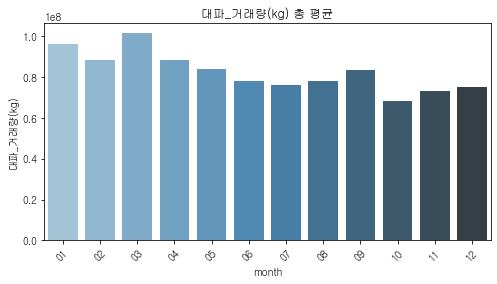

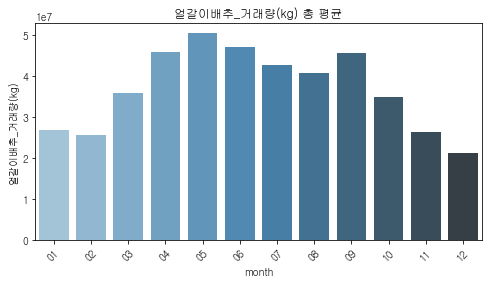

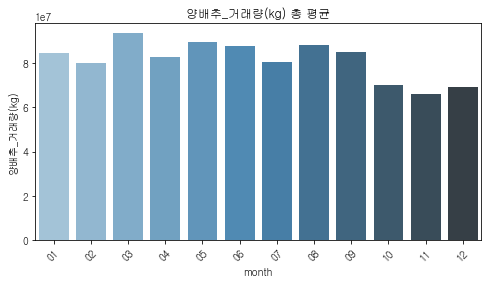

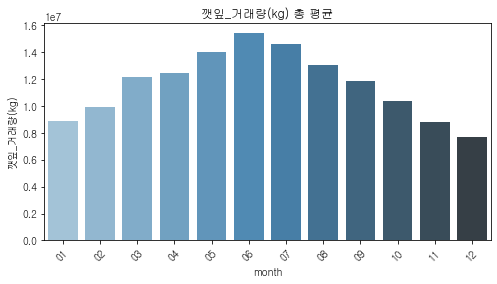

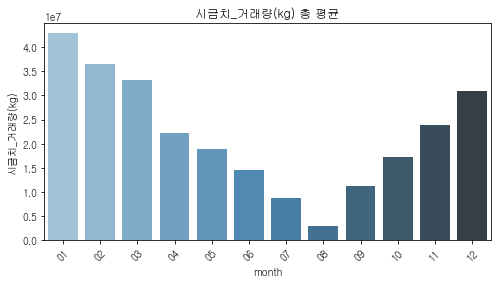

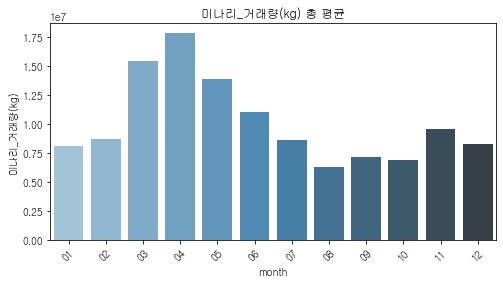

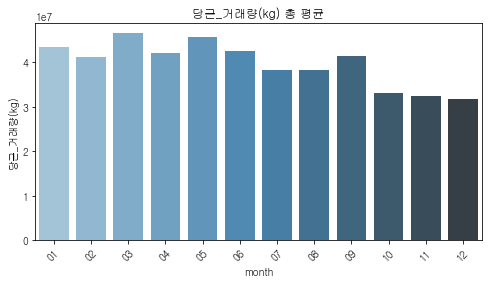

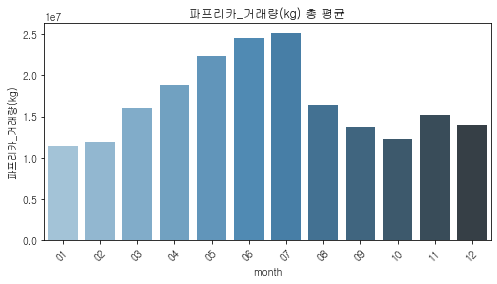

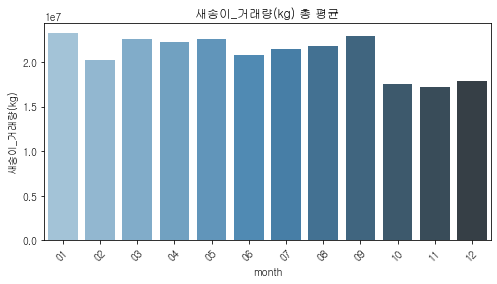

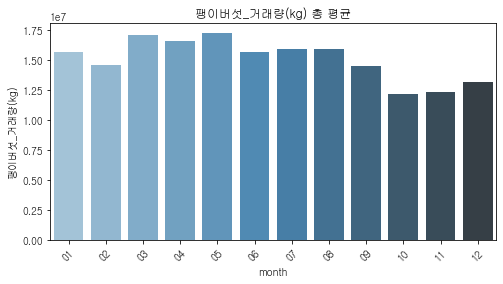

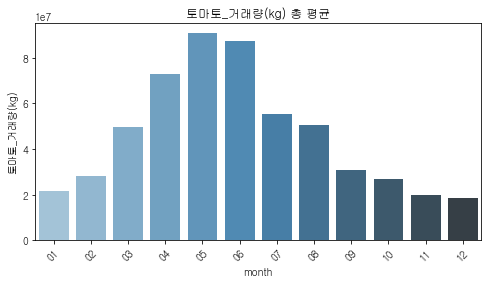

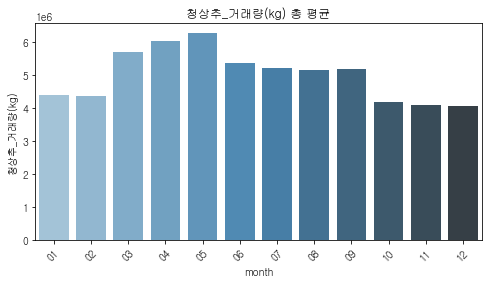

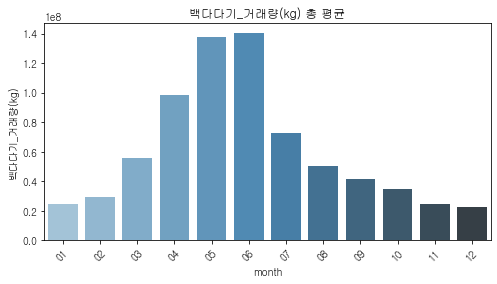

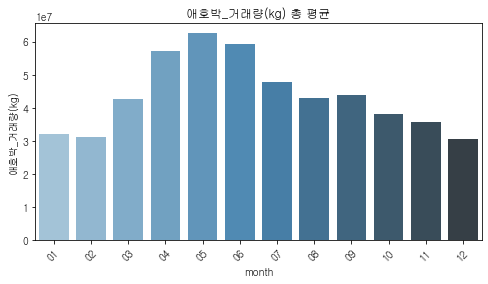

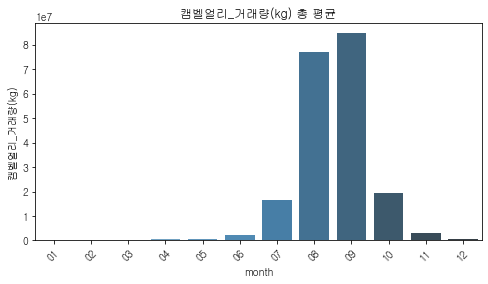

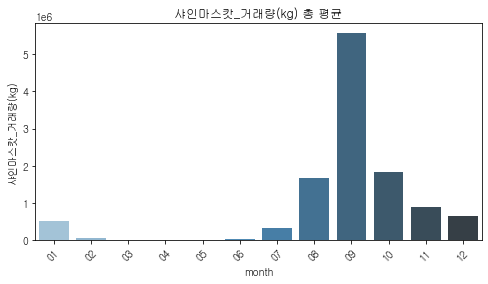

In [10]:
#거래량 합 월간 EDA

trading_sum = train_trading.groupby(['month']).sum()

for i in trading_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = trading_sum.index, y='%s'%i, data=trading_sum ,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 총 평균'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2010295457.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


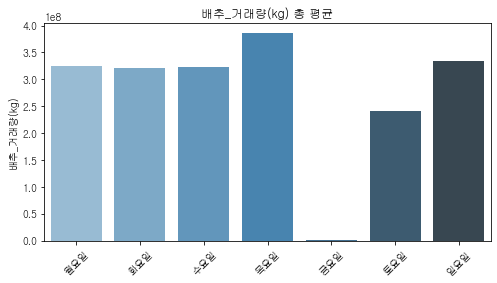

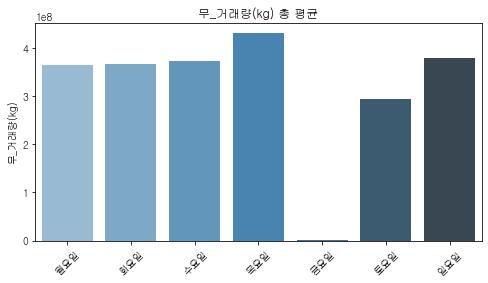

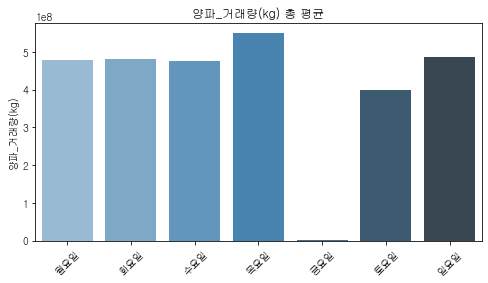

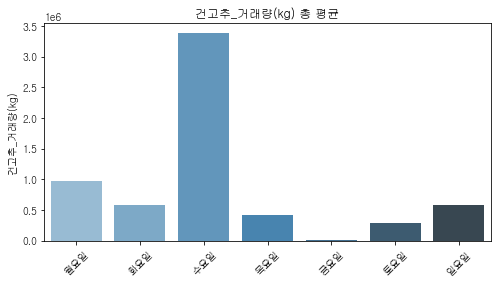

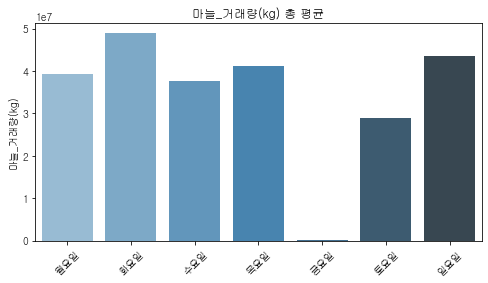

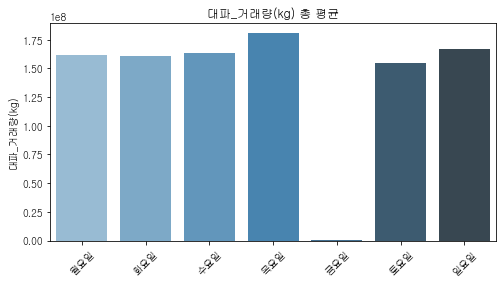

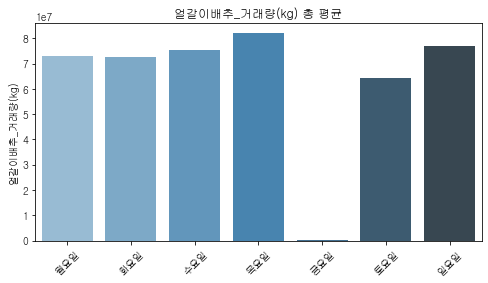

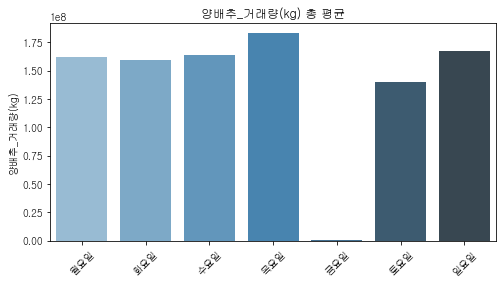

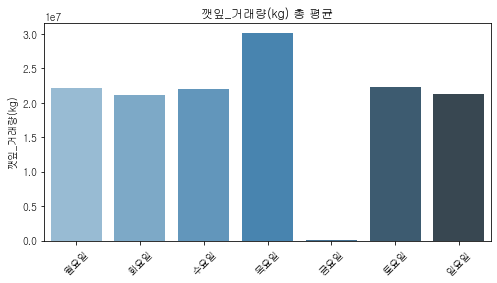

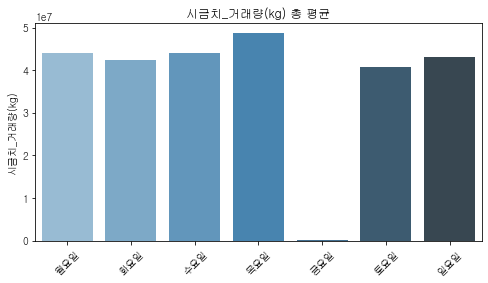

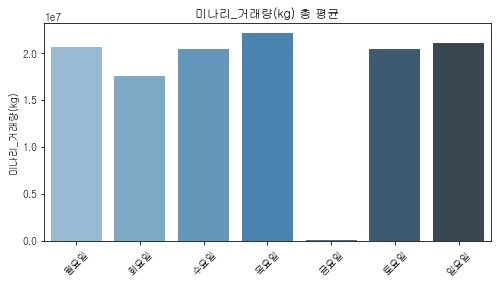

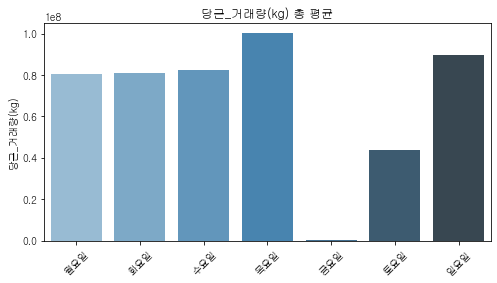

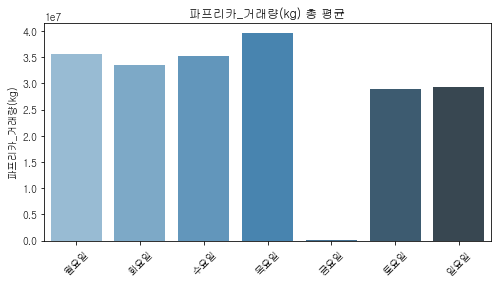

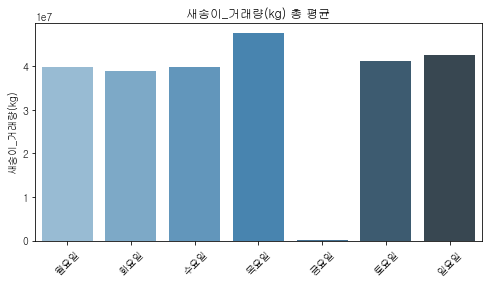

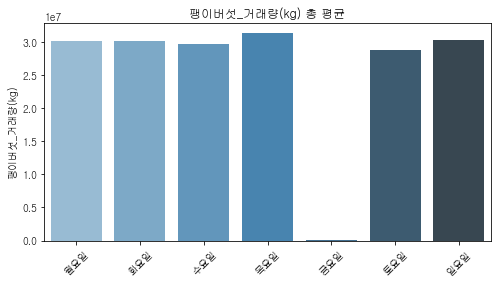

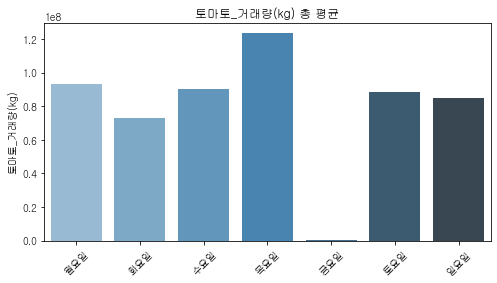

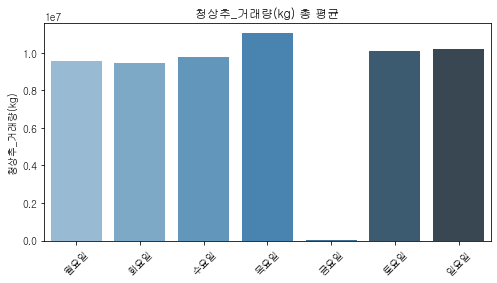

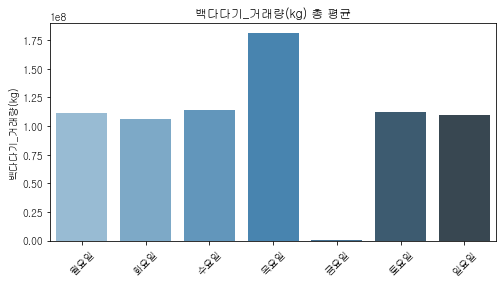

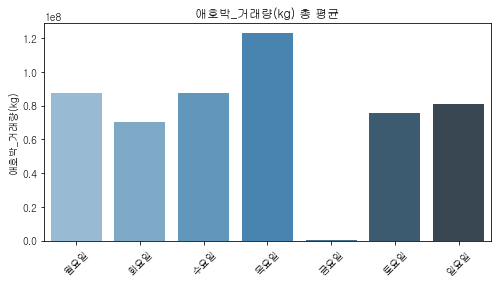

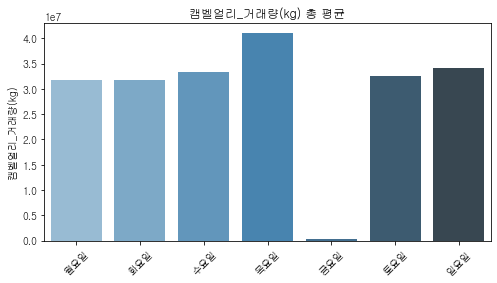

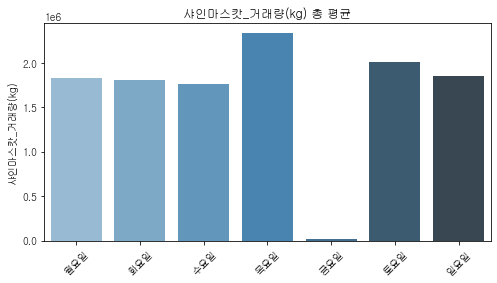

In [11]:
#거래량 합 요일별 EDA

trading_sum = train_trading.groupby(['dow']).sum()
day = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
for i in trading_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = day, y='%s'%i, data=trading_sum ,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 총 평균'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2487393674.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


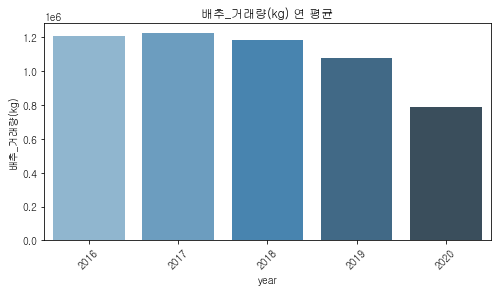

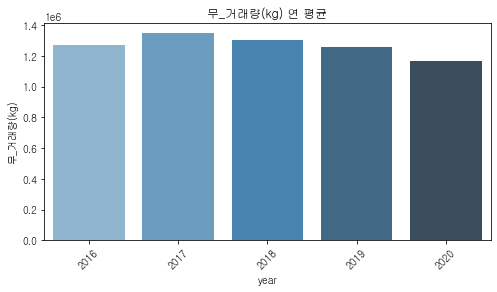

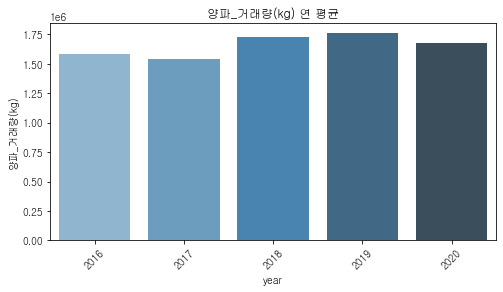

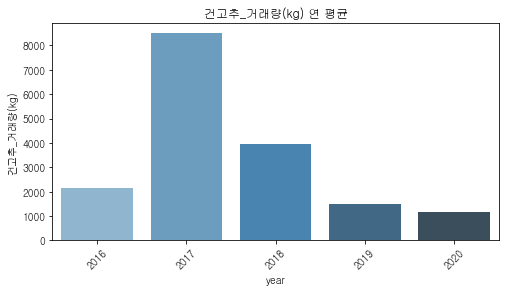

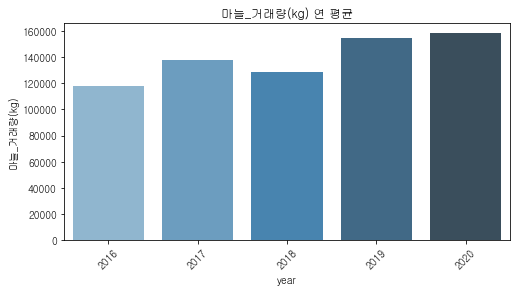

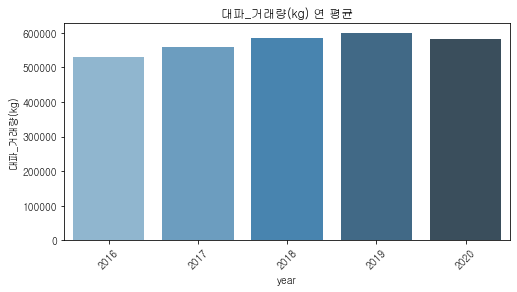

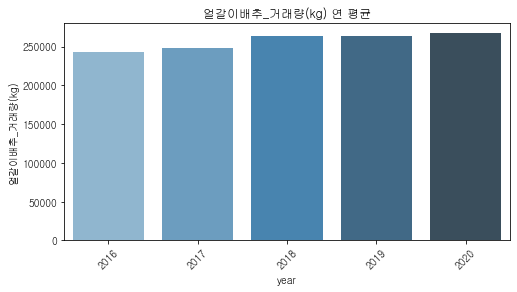

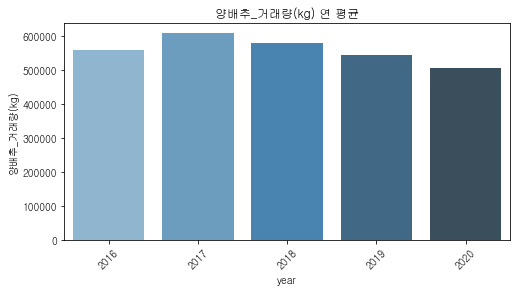

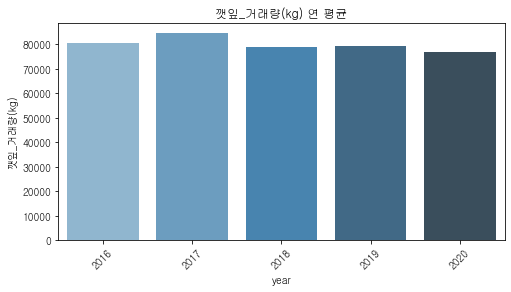

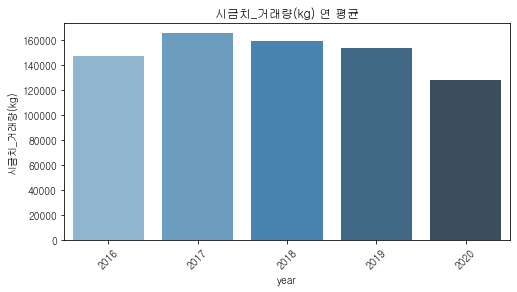

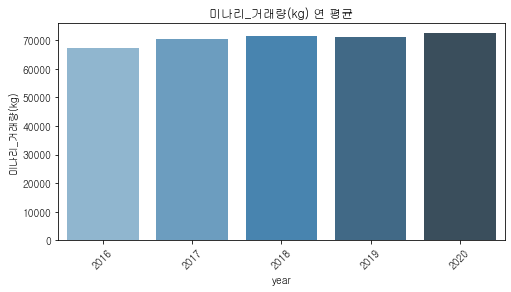

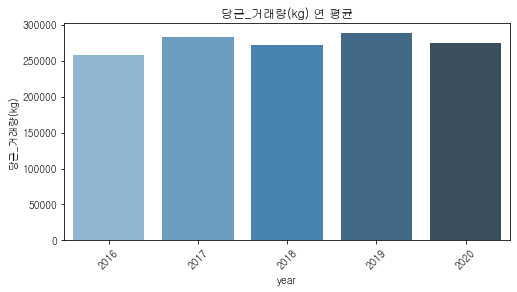

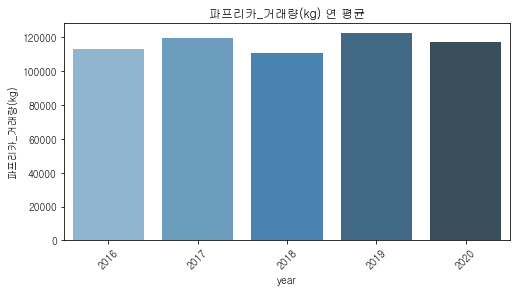

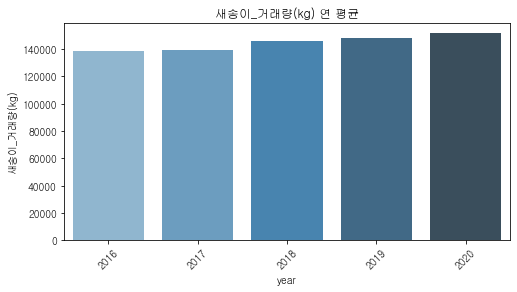

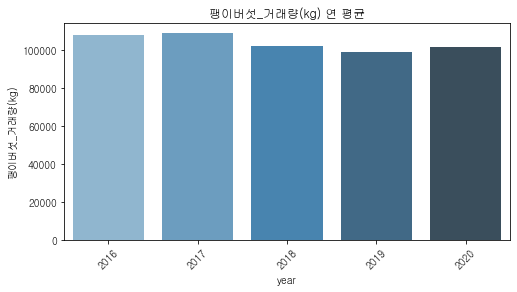

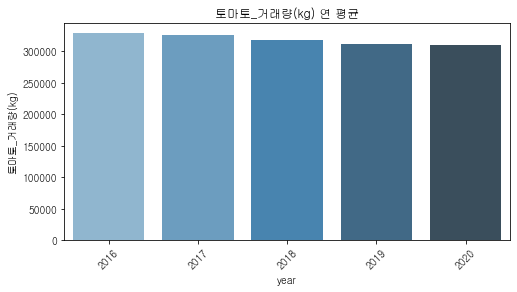

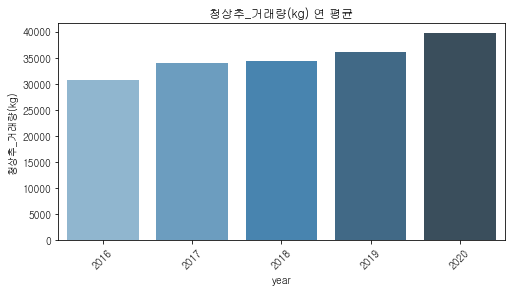

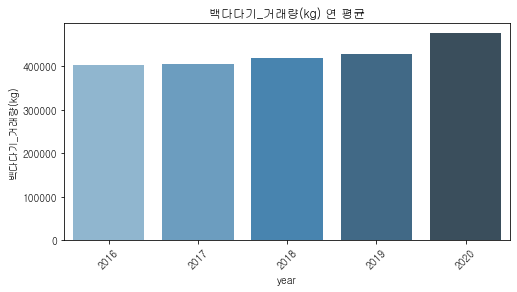

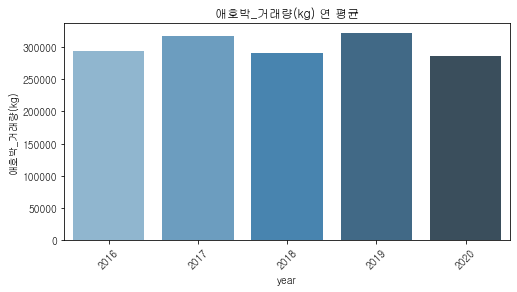

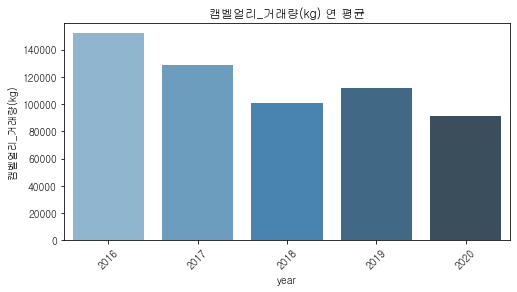

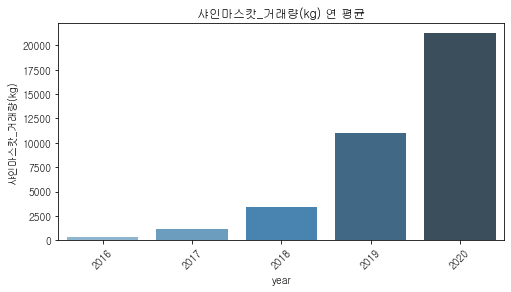

In [12]:
#거래량 평균 연간 EDA

trading_mean = train_trading.groupby(['year']).mean()

for i in trading_mean.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = trading_mean.index,y='%s'%i, data=trading_mean,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 연 평균'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/3037044165.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


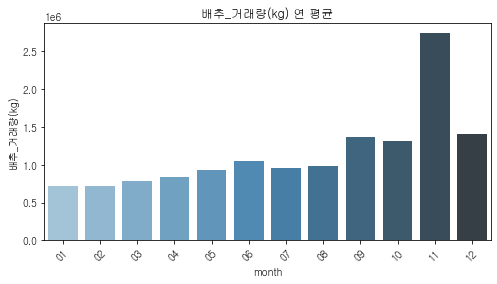

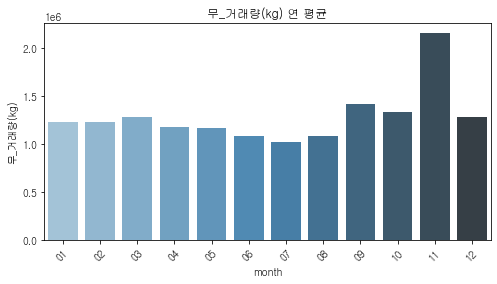

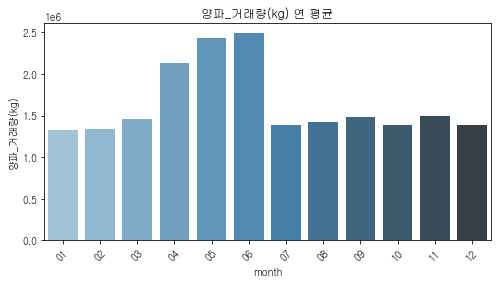

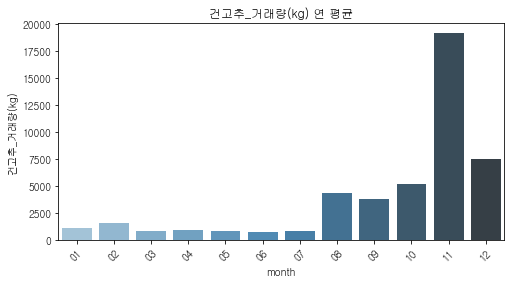

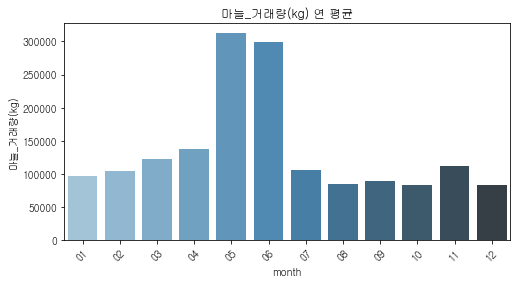

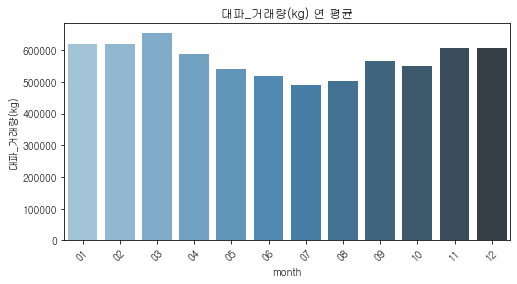

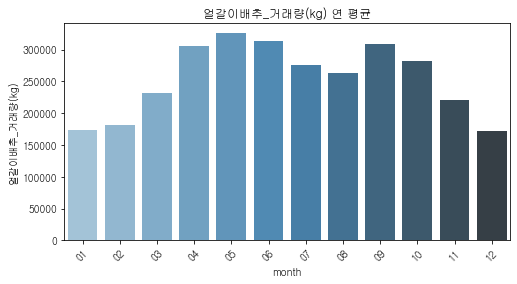

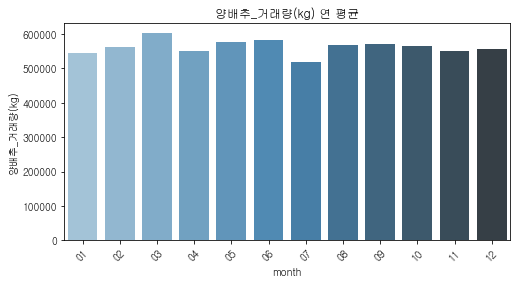

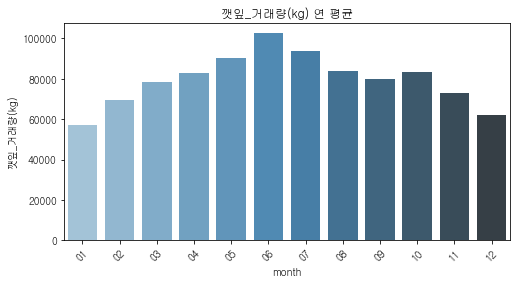

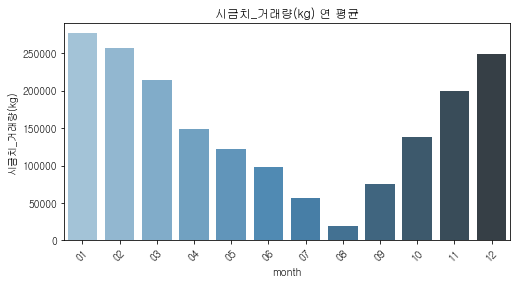

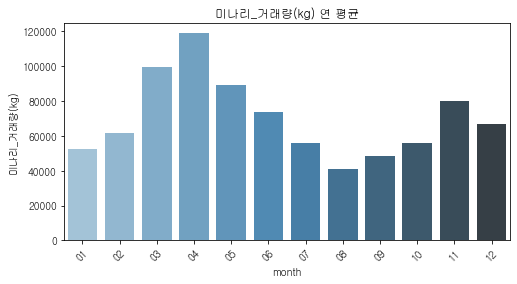

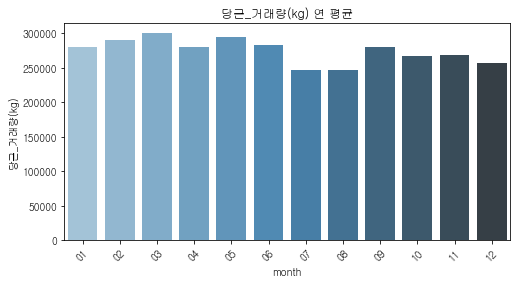

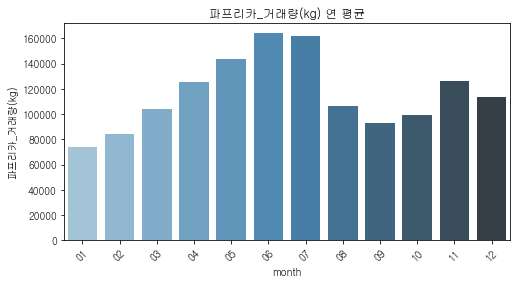

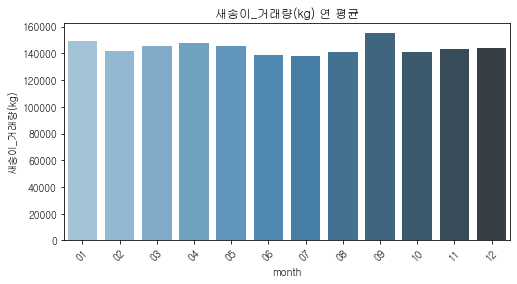

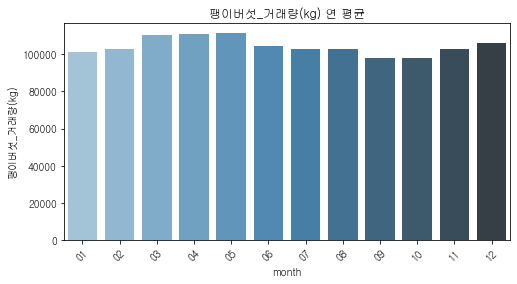

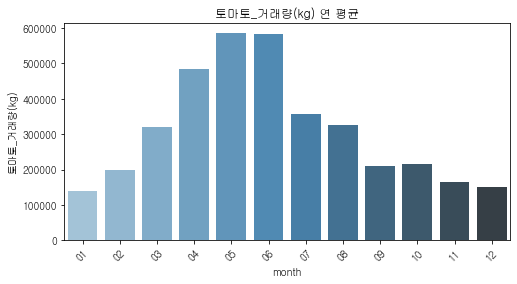

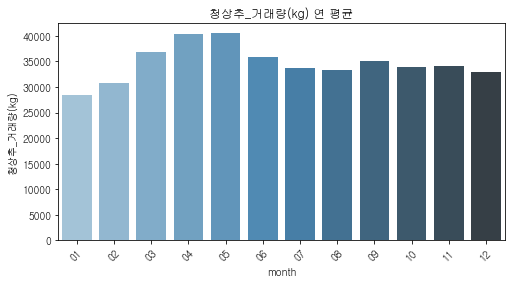

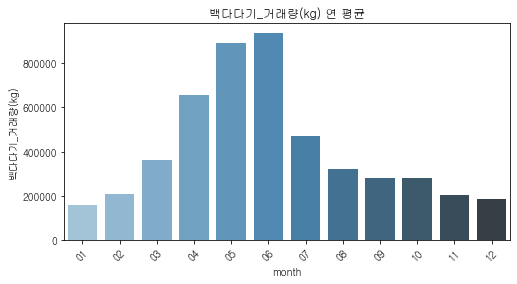

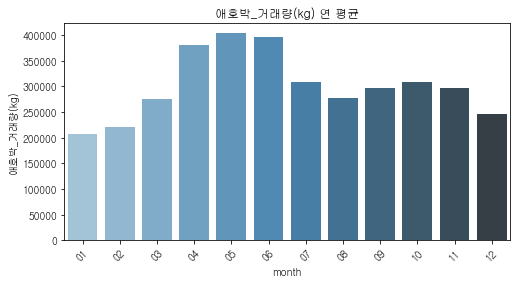

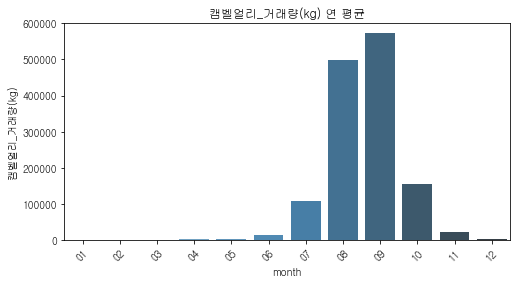

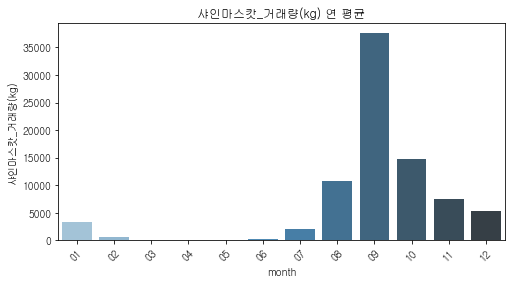

In [13]:
#거래량 평균 월간 EDA

trading_mean = train_trading.groupby(['month']).mean()

for i in trading_mean.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = trading_mean.index,y='%s'%i, data=trading_mean,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 연 평균'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/3425327664.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


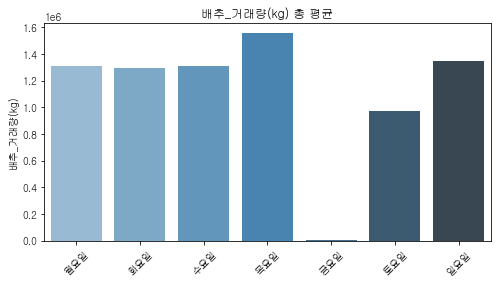

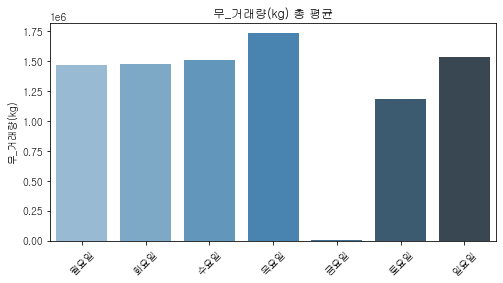

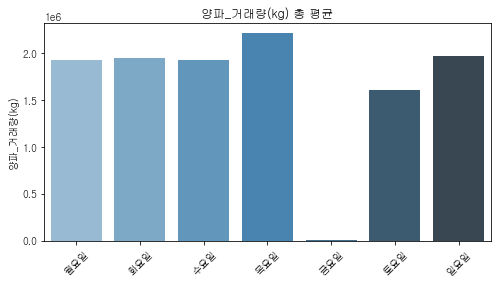

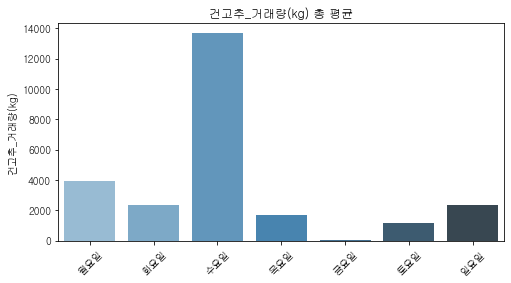

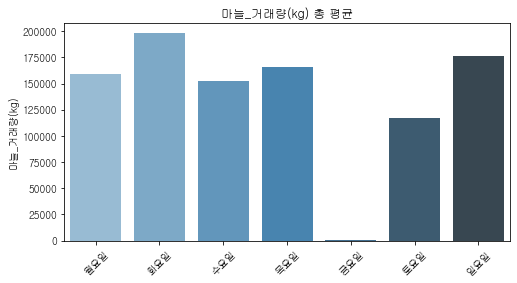

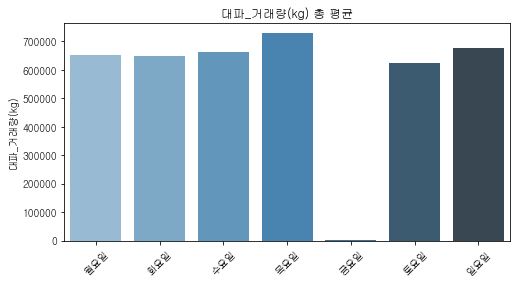

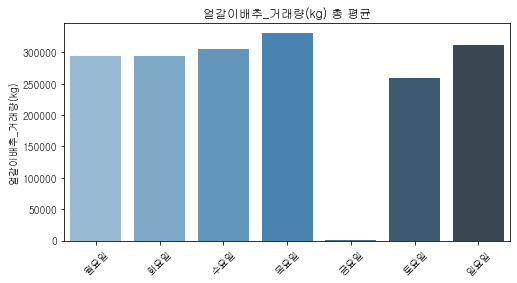

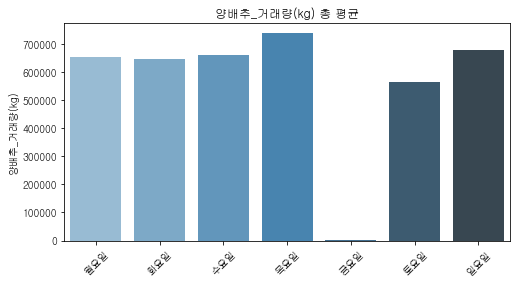

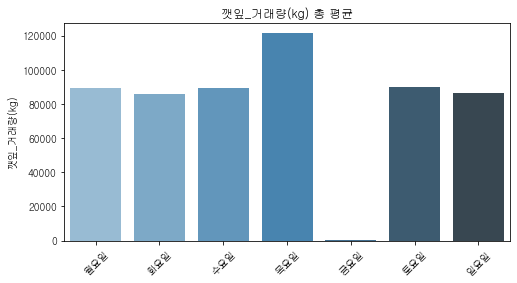

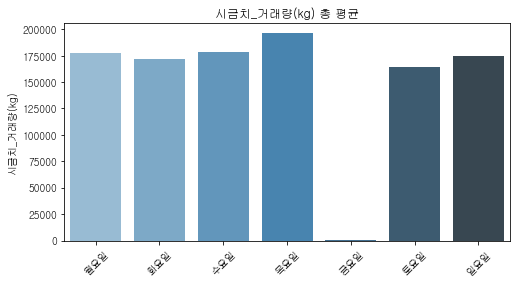

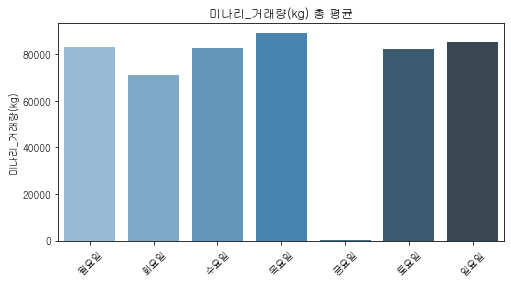

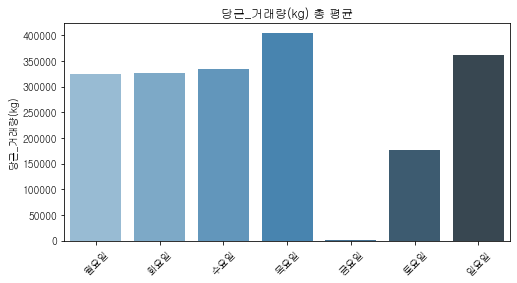

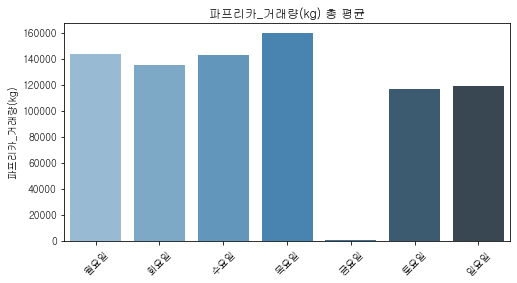

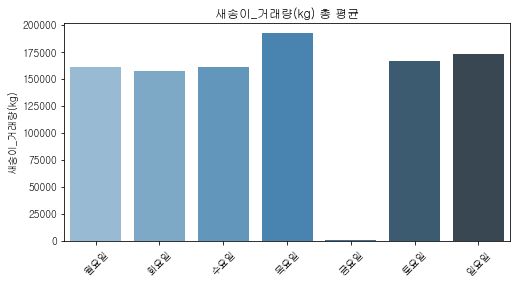

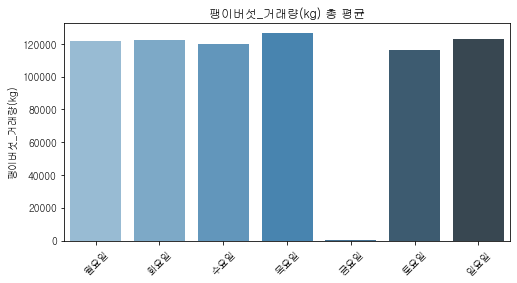

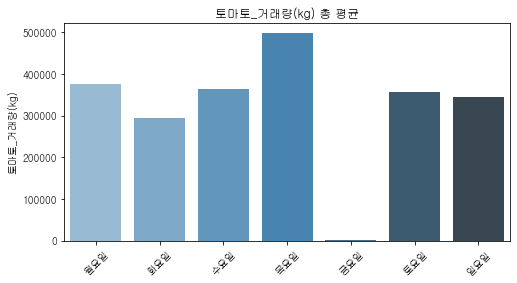

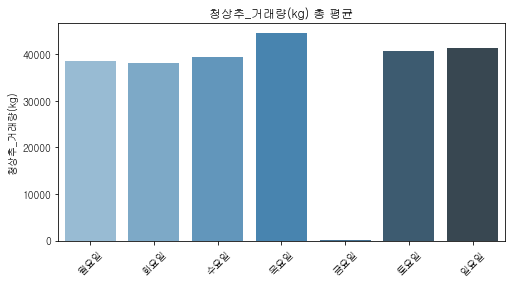

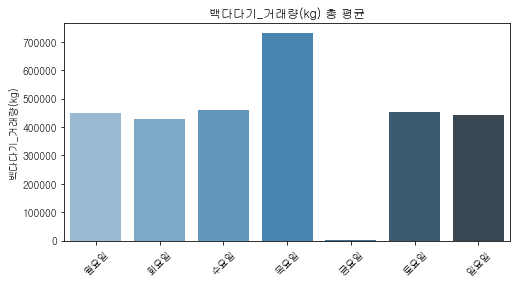

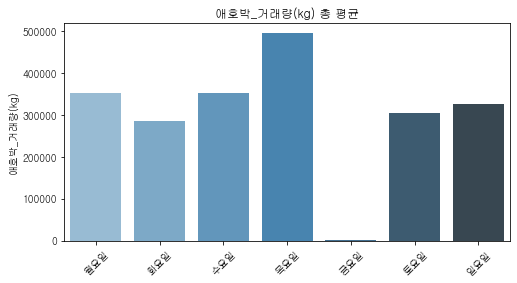

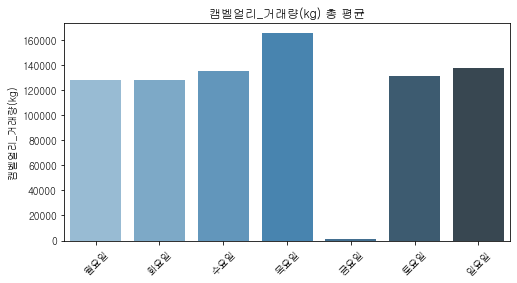

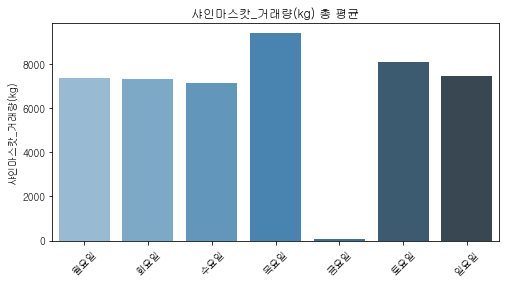

In [14]:
#거래량 평균 요일별 EDA

trading_sum = train_trading.groupby(['dow']).mean()
day = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
for i in trading_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = day, y='%s'%i, data=trading_sum ,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 총 평균'%i)

#### 가격 EDA

In [15]:
#가격
train_price = train.iloc[:,3::2]
train_price['year'] = train['date'].str[:4]
train_price['month'] = train['date'].str[5:7]
train_price['day'] = train['date'].str[8:]
train_price['dow'] = train['요일']
train_price.head()

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),...,토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg),month,year,day,dow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,01,2016,01,금요일
1,329.0,360.0,1281.0,11000.0,5475.0,1704.0,1331.0,348.0,13242.0,2339.0,...,1621.0,9235.0,2109.0,2414.0,2014.0,0.0,01,2016,02,토요일
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,01,2016,03,일요일
3,478.0,382.0,1235.0,4464.0,5210.0,1716.0,1212.0,345.0,9923.0,2153.0,...,1834.0,7631.0,2046.0,2018.0,3885.0,0.0,01,2016,04,월요일
4,442.0,422.0,1213.0,4342.0,5387.0,1715.0,1197.0,350.0,9529.0,2220.0,...,1833.0,6926.0,2268.0,2178.0,2853.0,0.0,01,2016,05,화요일


C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2484228380.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


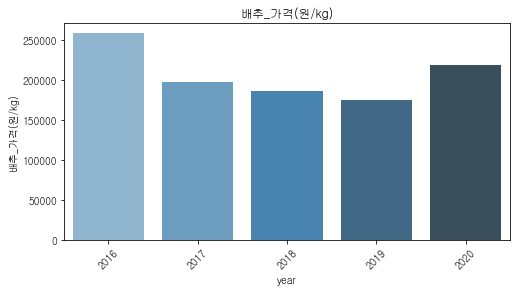

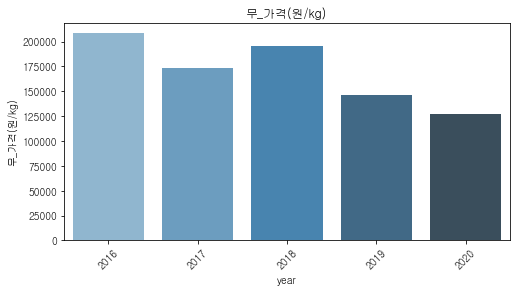

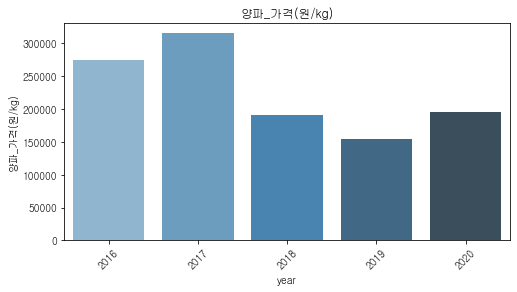

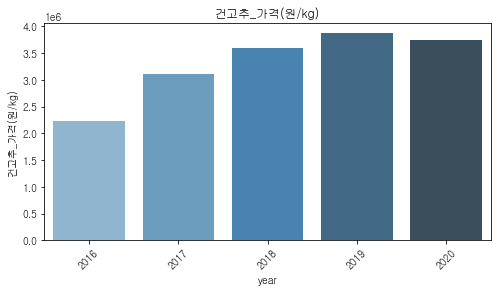

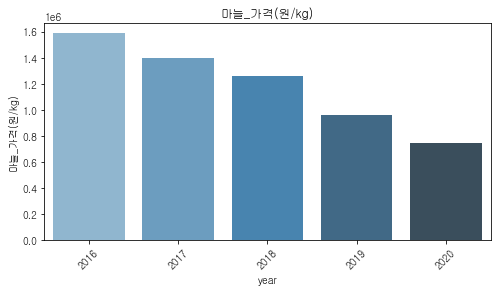

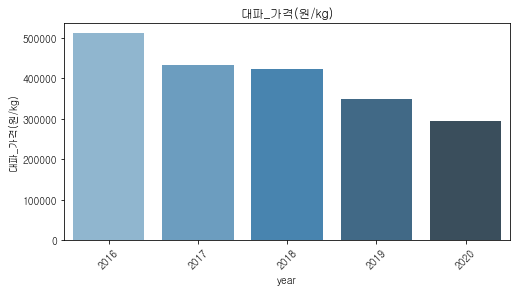

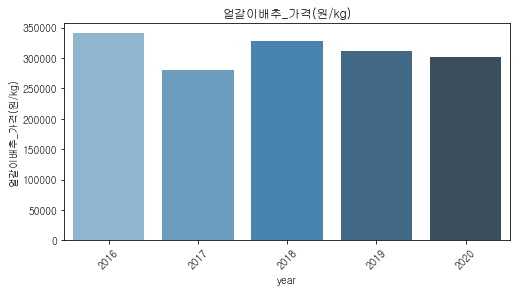

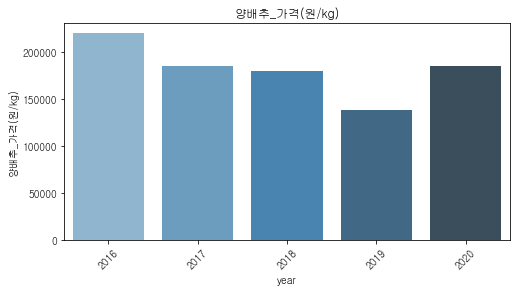

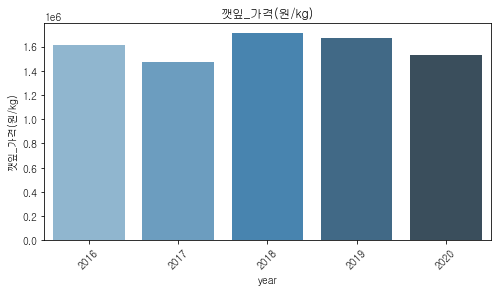

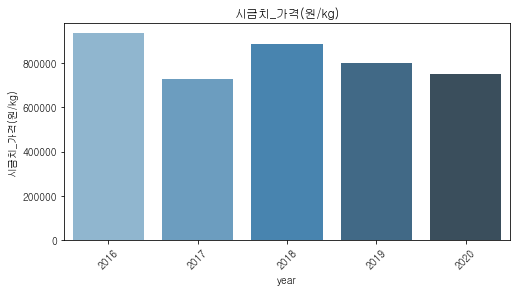

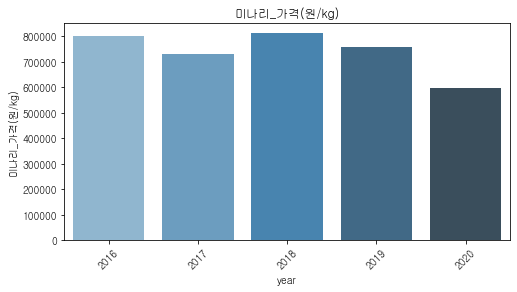

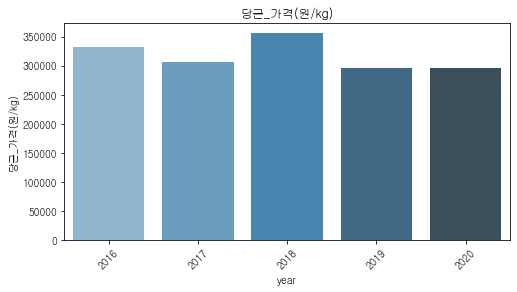

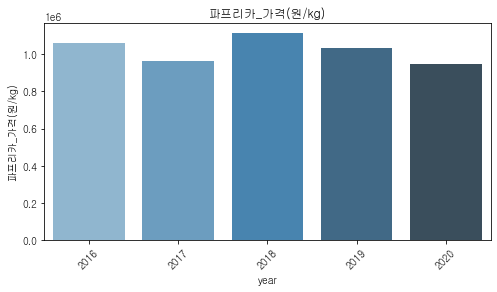

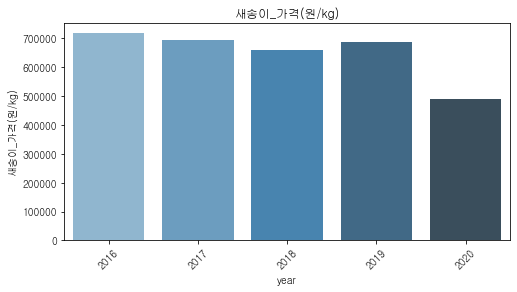

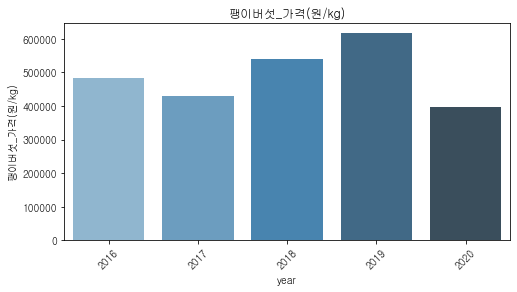

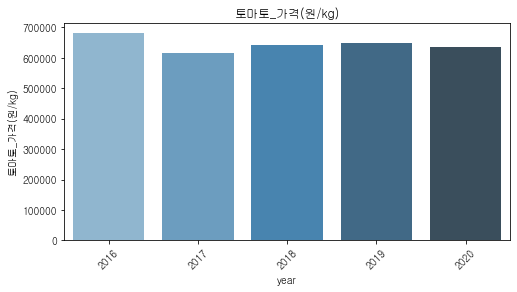

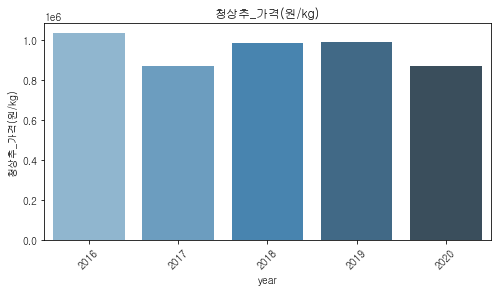

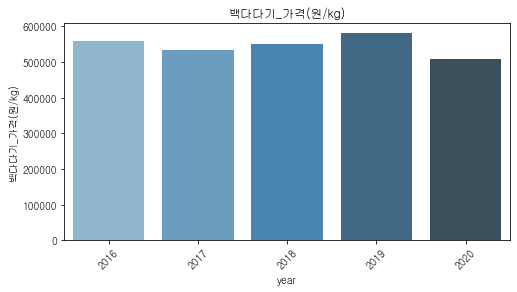

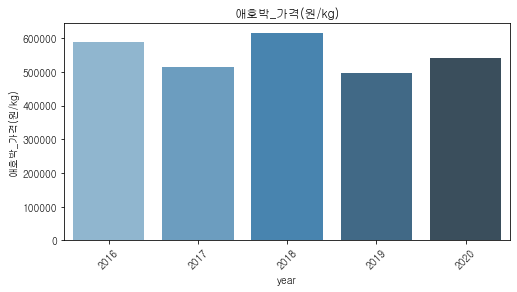

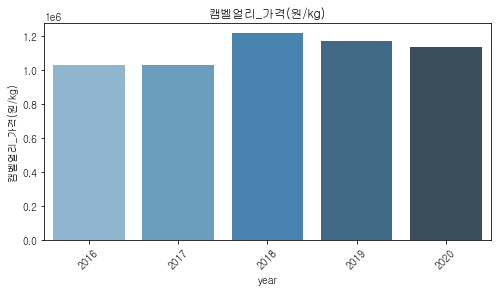

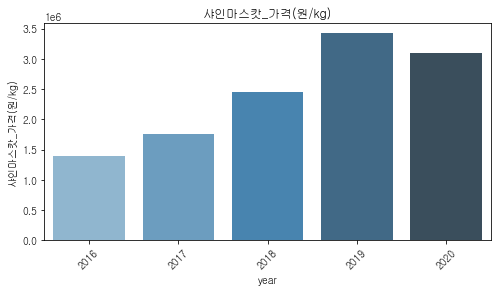

In [16]:
#가격 합 연간 EDA

price_sum = train_price.groupby(['year']).sum()

for i in price_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = price_sum.index,y='%s'%i, data=price_sum, palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/788581637.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


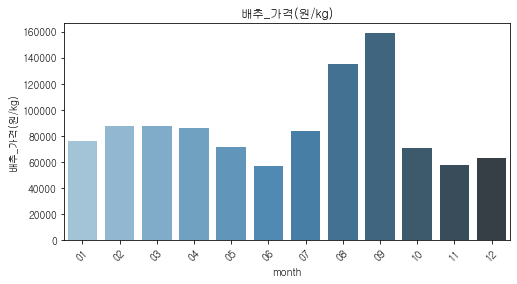

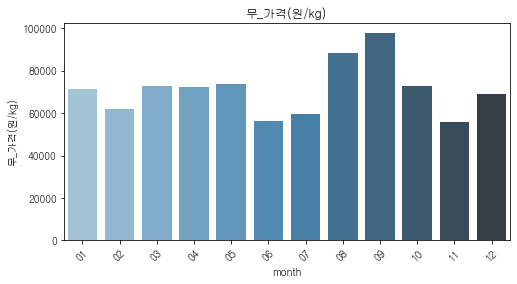

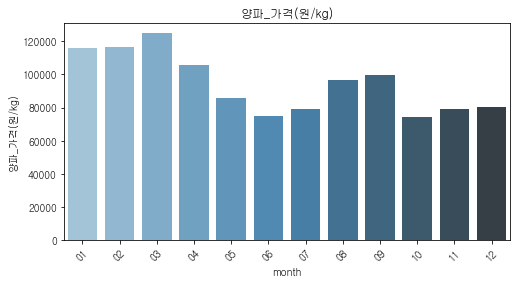

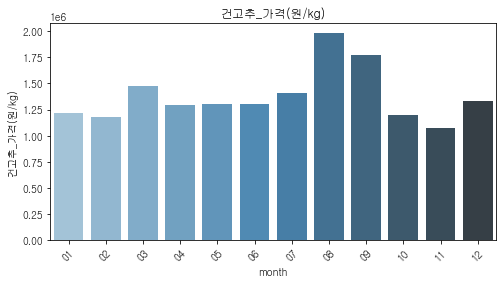

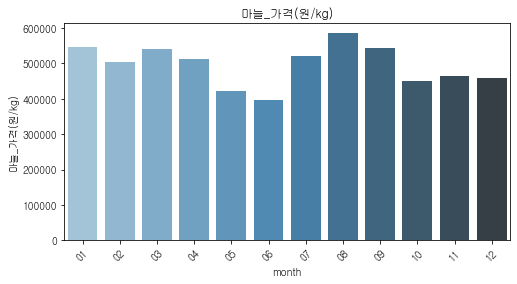

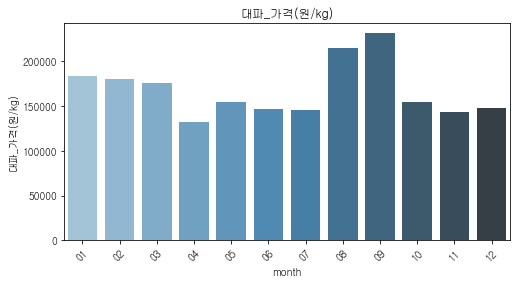

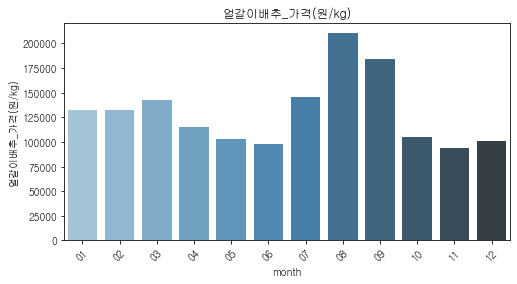

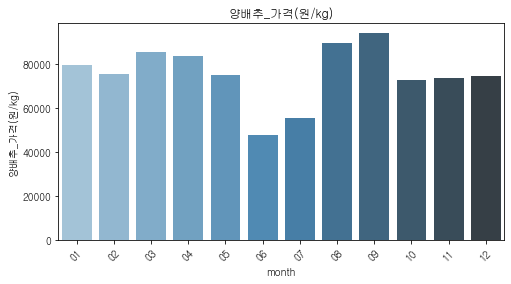

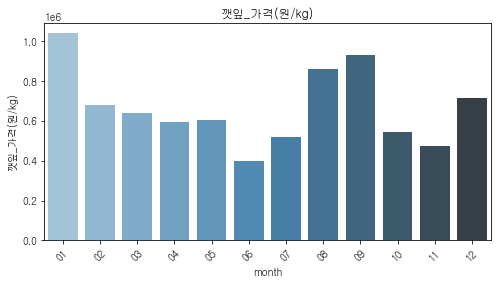

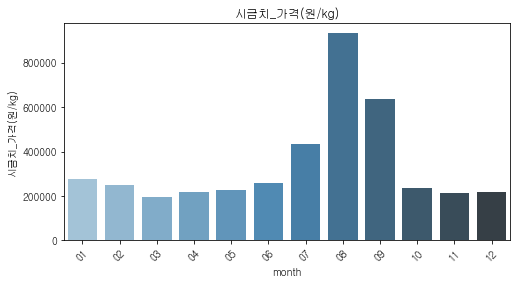

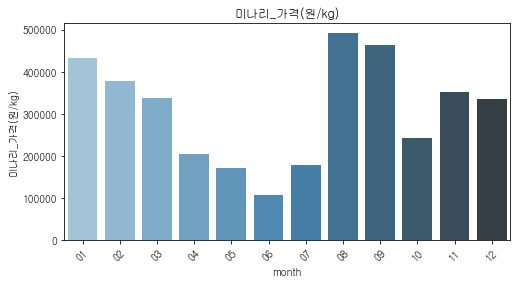

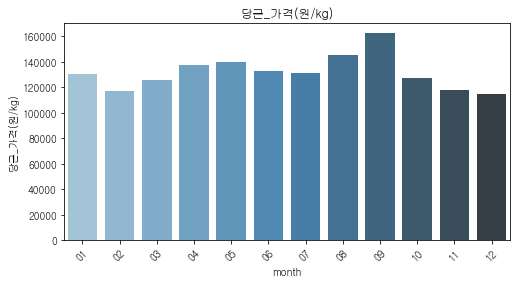

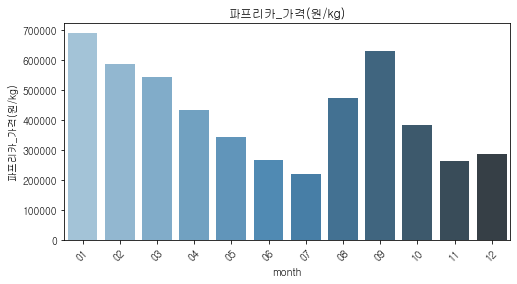

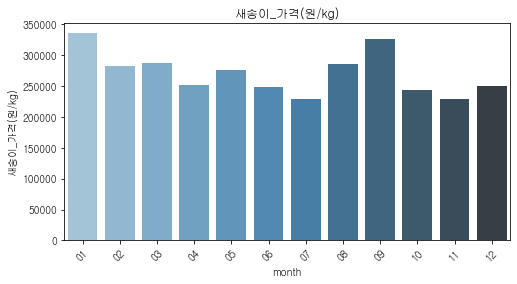

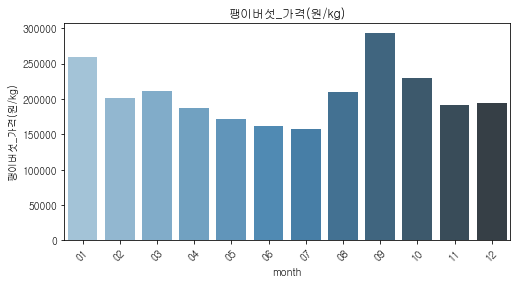

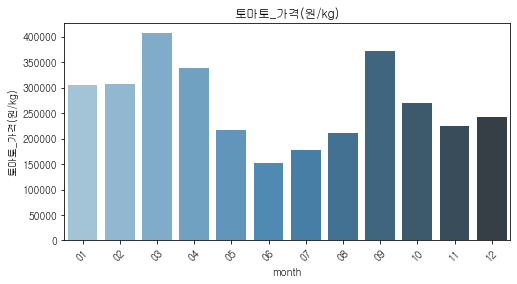

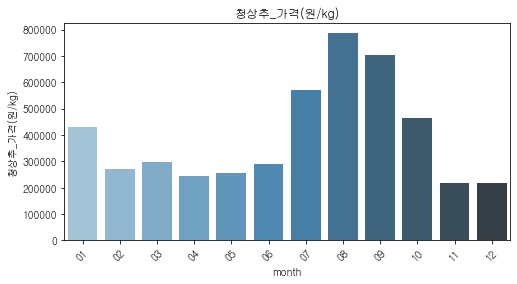

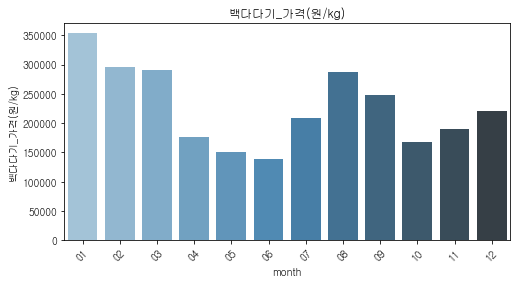

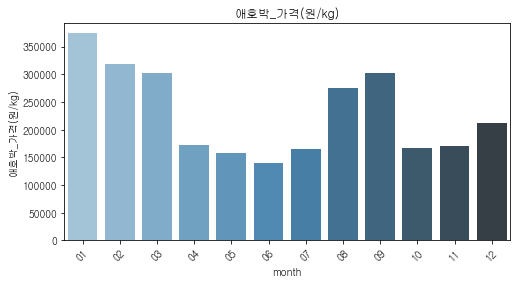

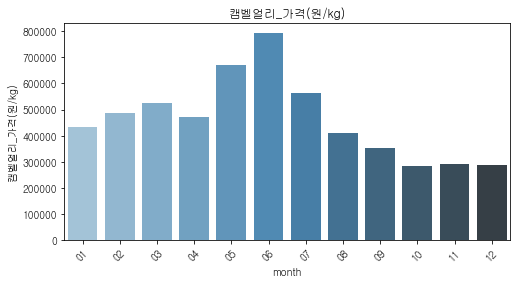

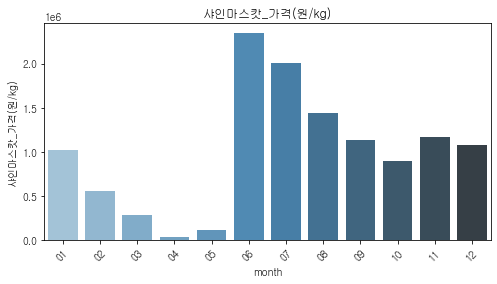

In [17]:
#가격 합 월간 EDA

price_sum = train_price.groupby(['month']).sum()

for i in price_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = price_sum.index,y='%s'%i, data=price_sum, palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/1451657400.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


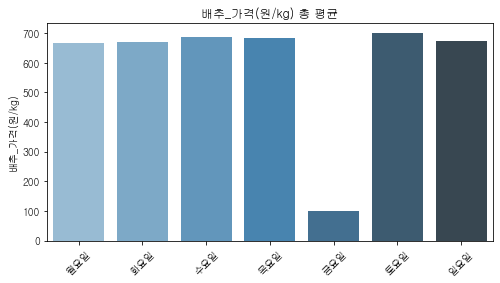

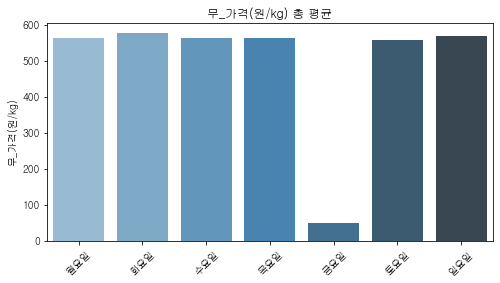

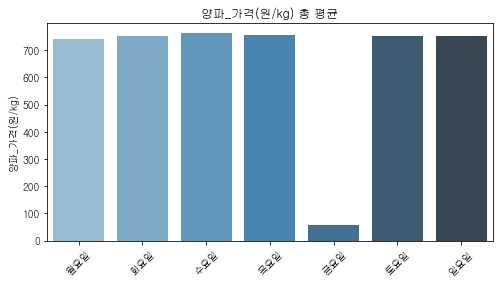

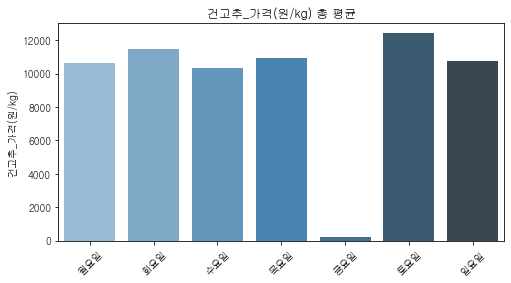

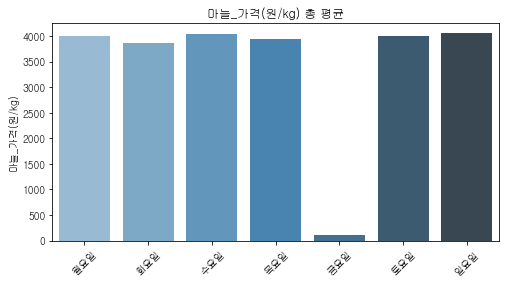

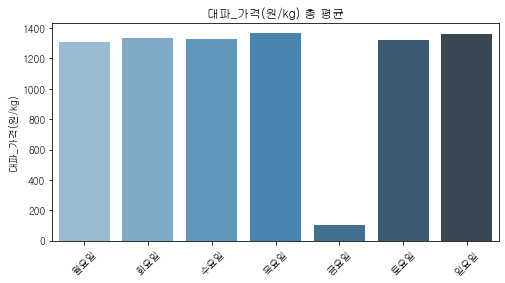

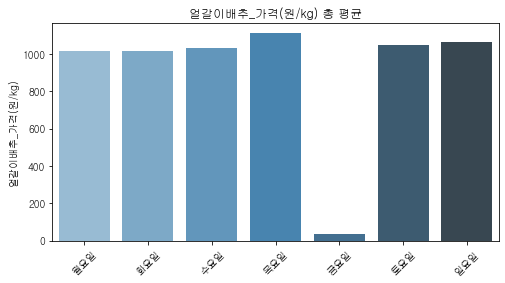

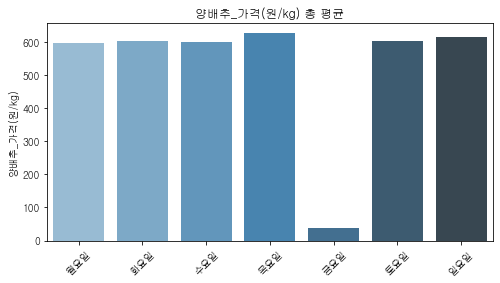

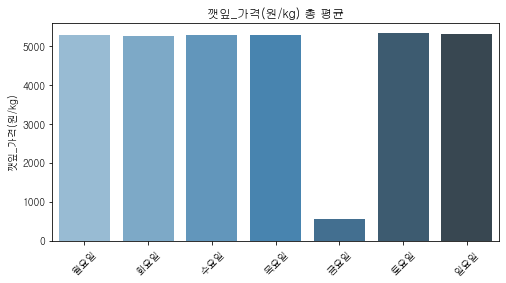

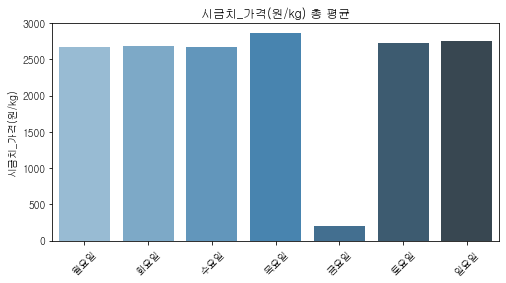

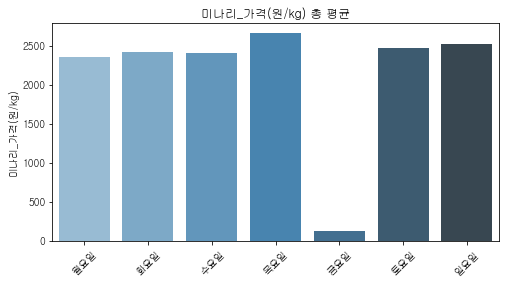

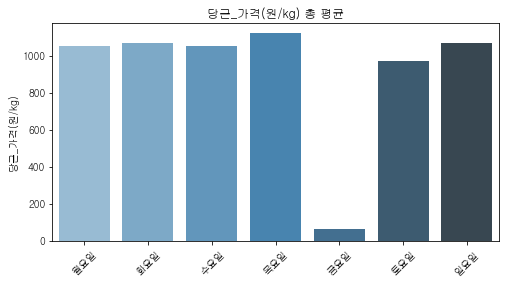

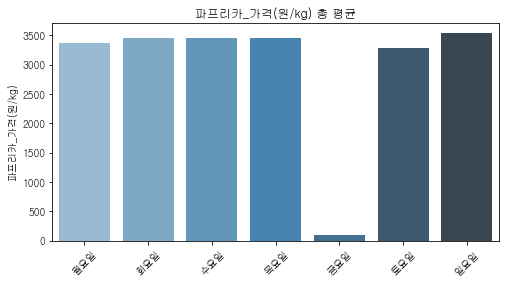

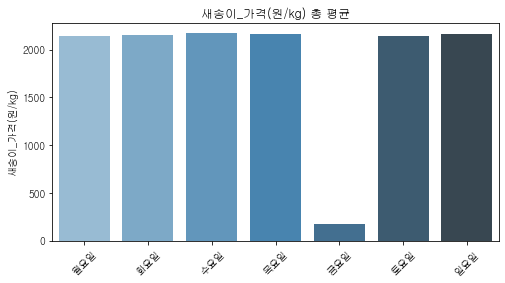

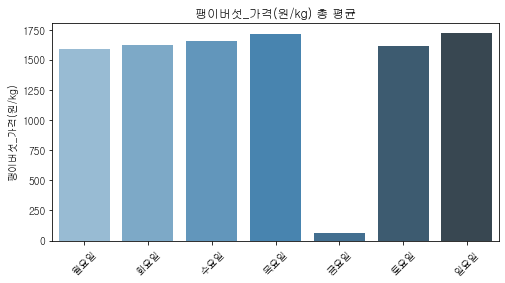

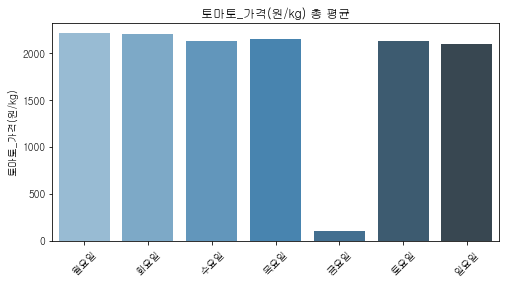

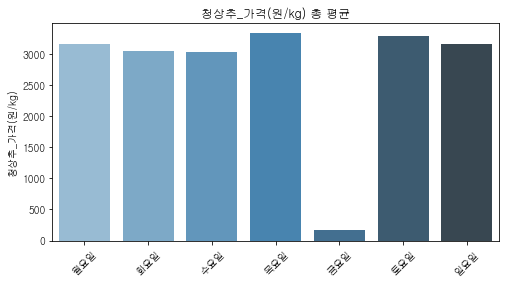

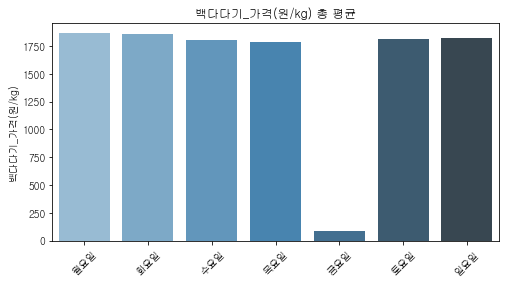

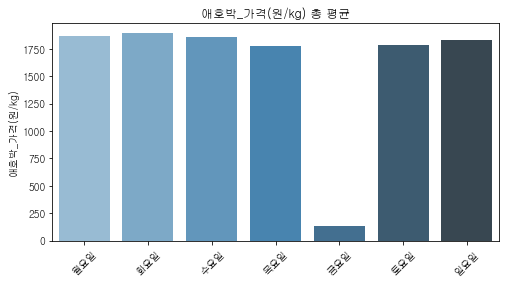

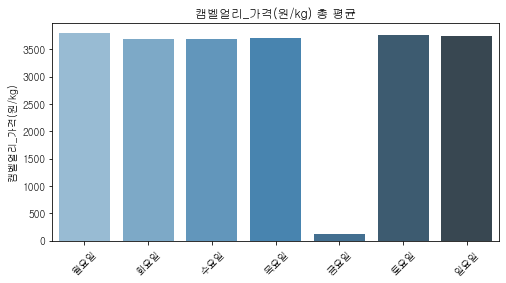

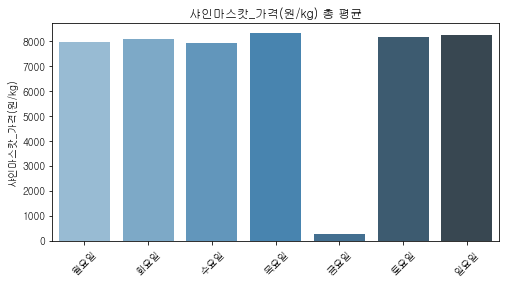

In [18]:
#가격 합 요일별 EDA

price_sum = train_price.groupby(['dow']).mean()
day = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
for i in price_sum.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = day, y='%s'%i, data=price_sum ,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 총 평균'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2373423348.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


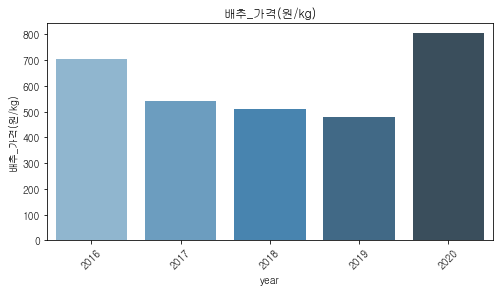

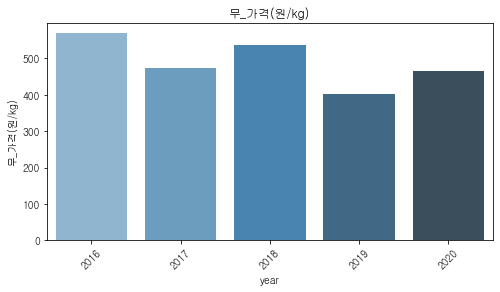

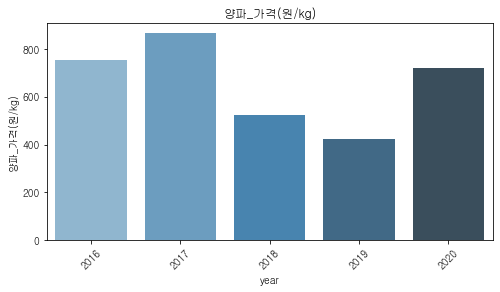

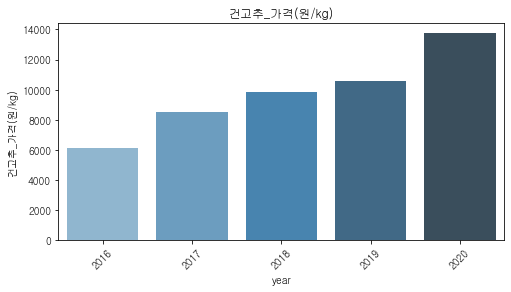

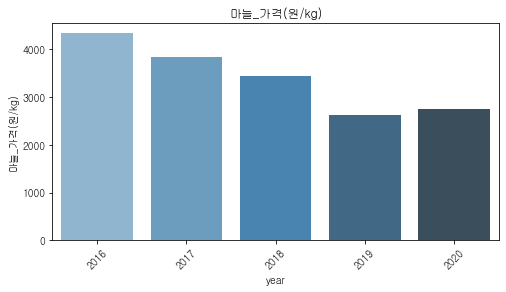

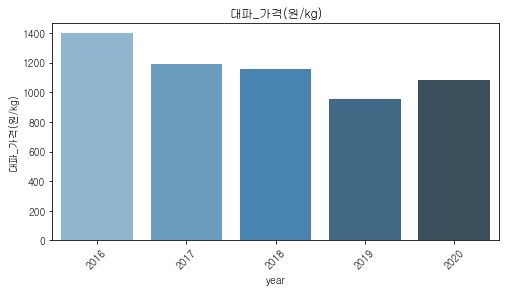

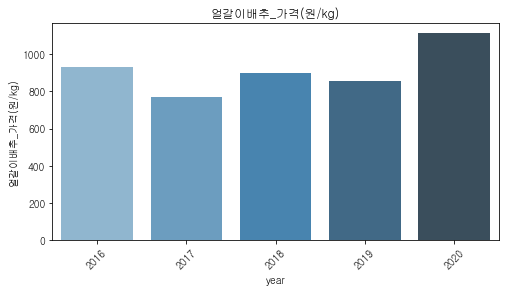

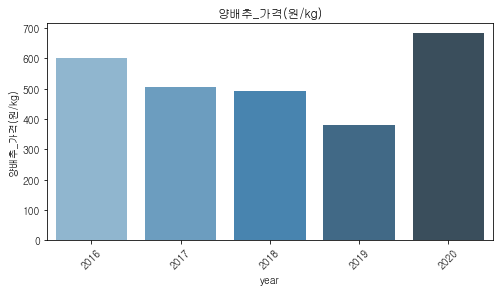

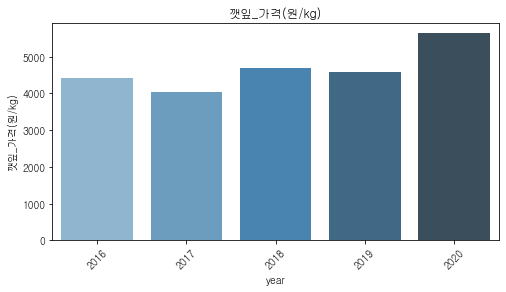

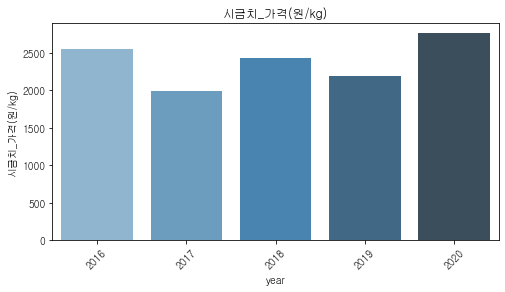

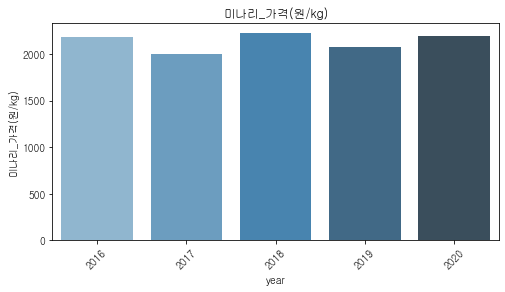

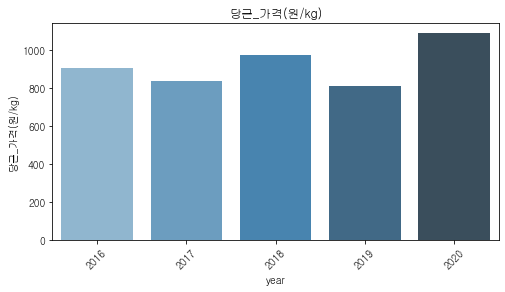

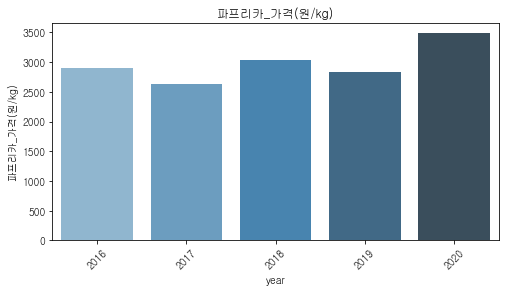

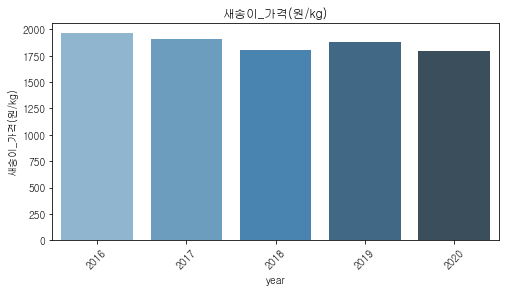

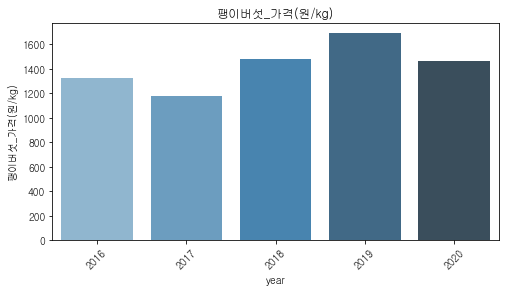

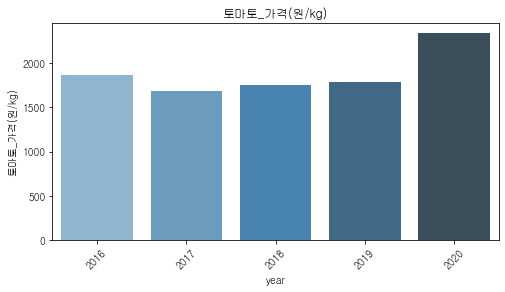

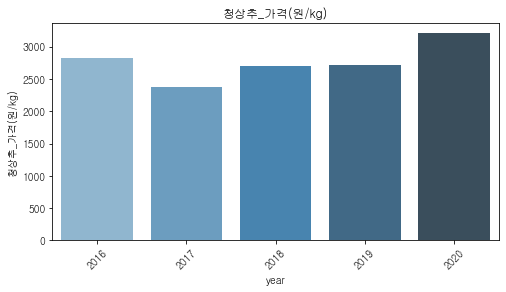

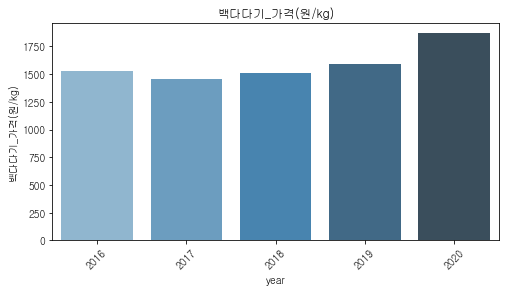

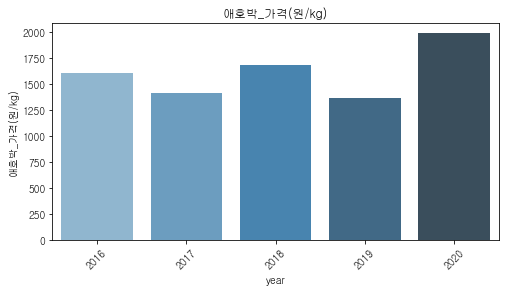

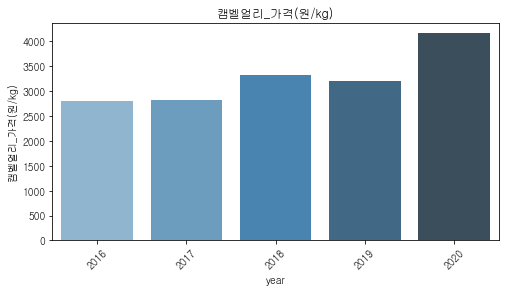

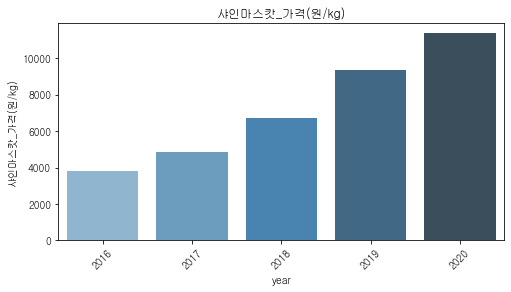

In [19]:
#가격 평균 연간 EDA

price_mean = train_price.groupby(['year']).mean()

for i in price_mean.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = price_mean.index,y='%s'%i, data=price_mean, palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/4098748953.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


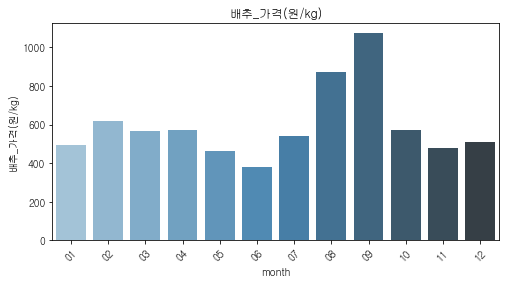

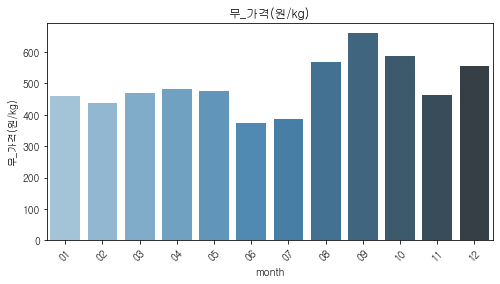

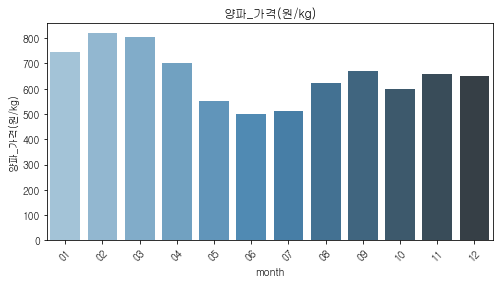

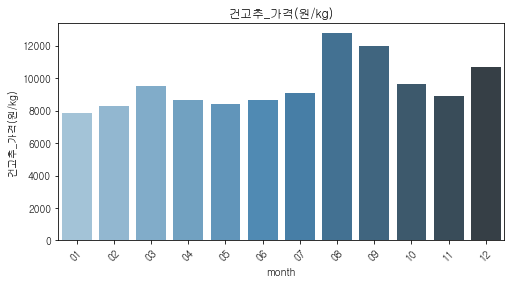

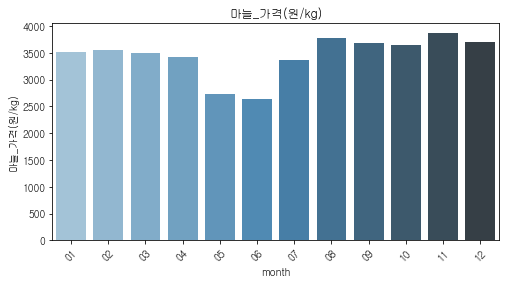

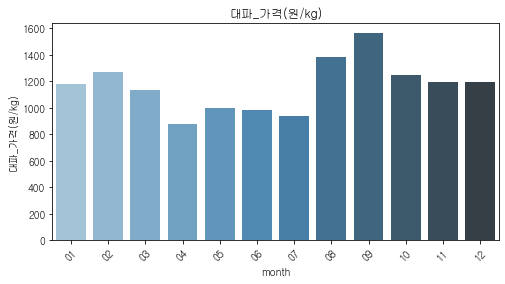

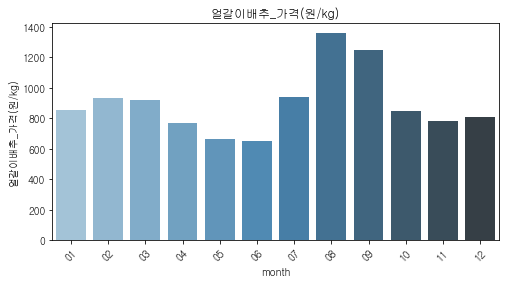

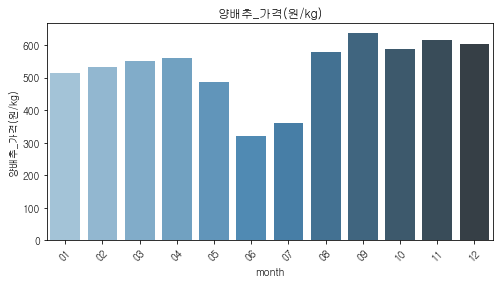

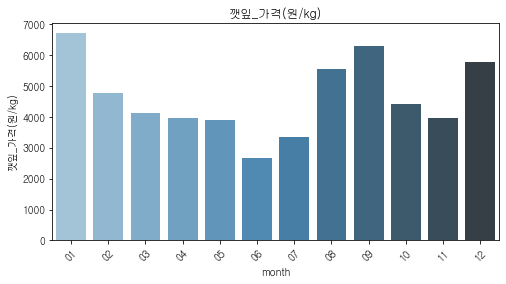

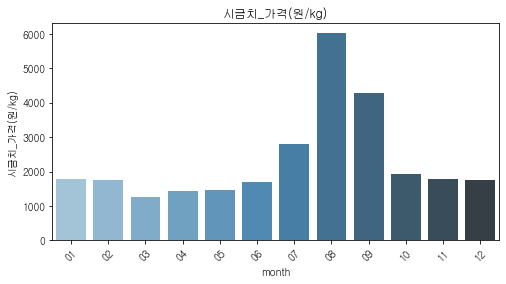

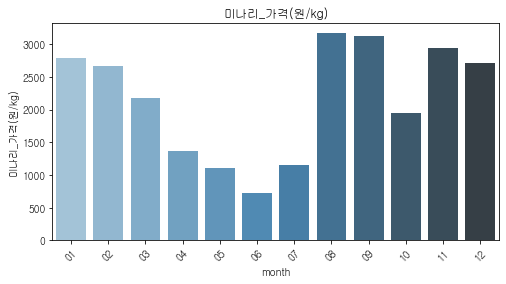

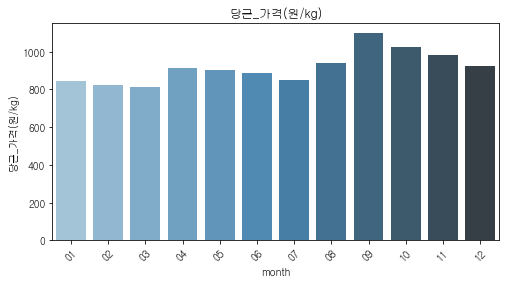

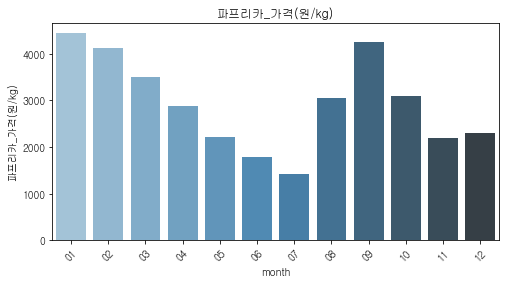

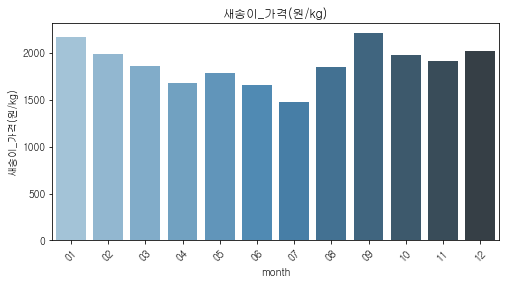

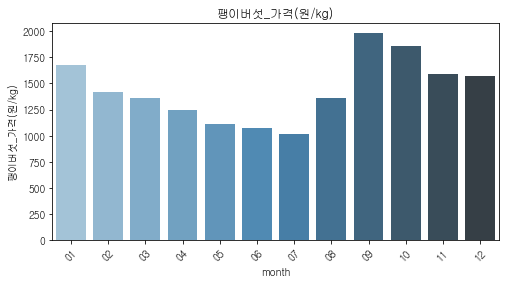

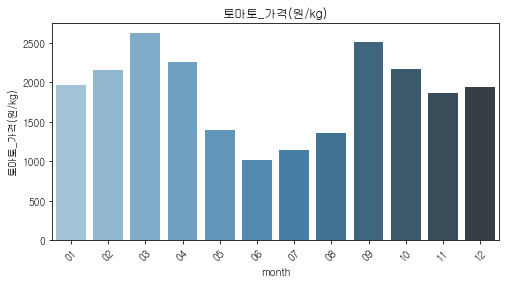

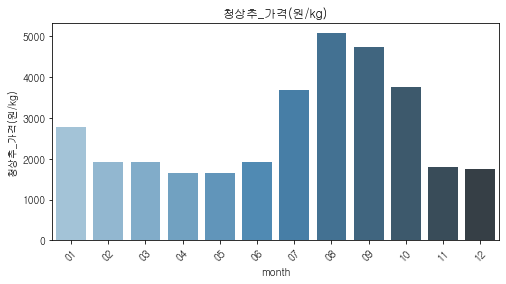

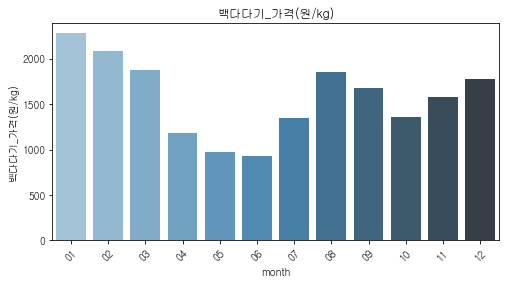

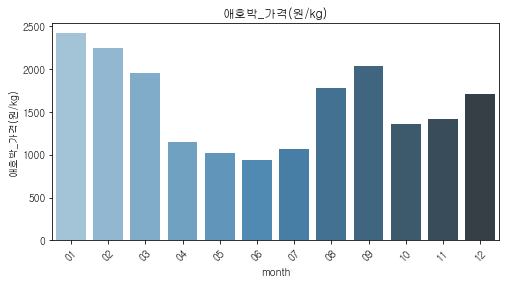

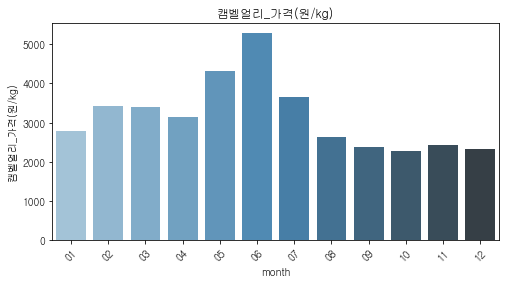

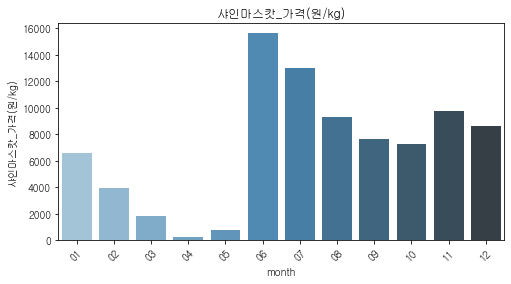

In [20]:
#가격 평균 월간 EDA

price_mean = train_price.groupby(['month']).mean()

for i in price_mean.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = price_mean.index,y='%s'%i, data=price_mean, palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s'%i)

C:\Users\juyeo\AppData\Local\Temp/ipykernel_17884/2438001511.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


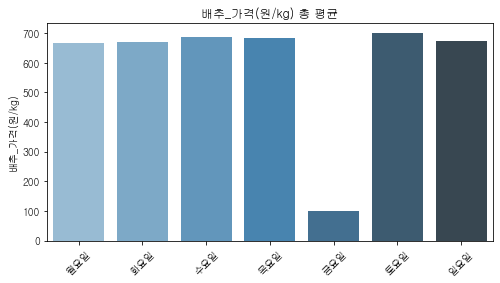

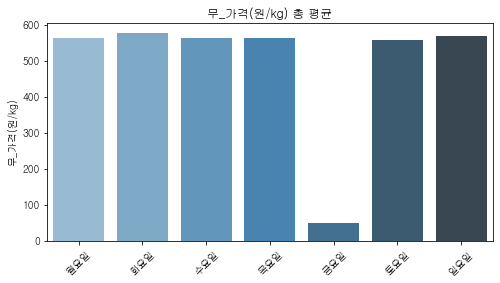

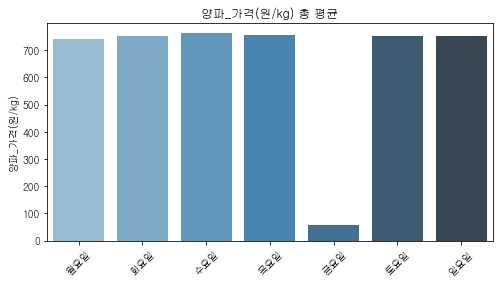

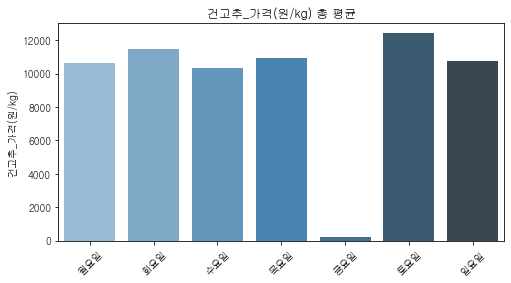

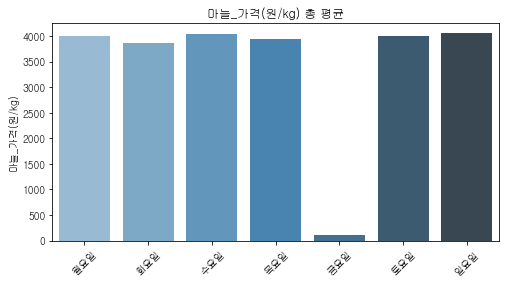

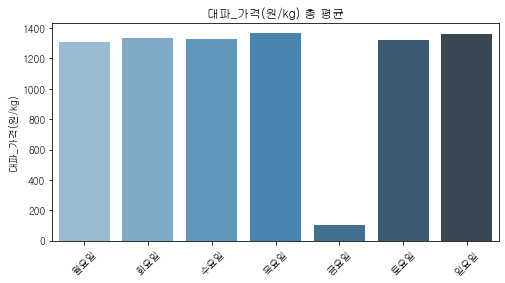

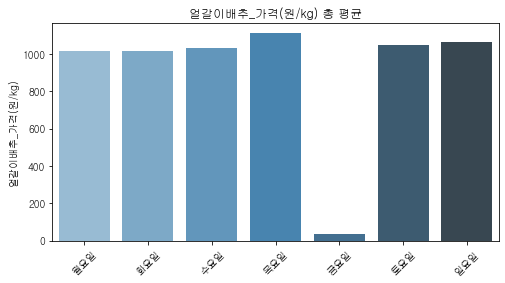

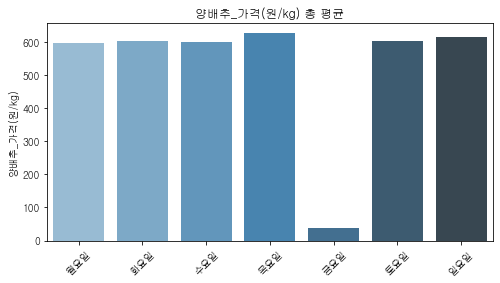

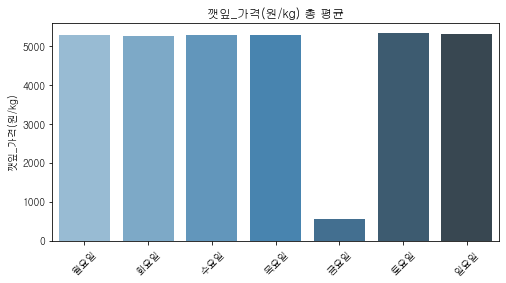

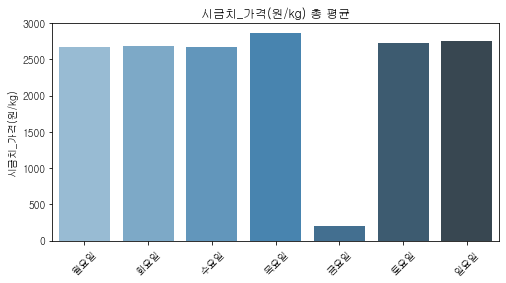

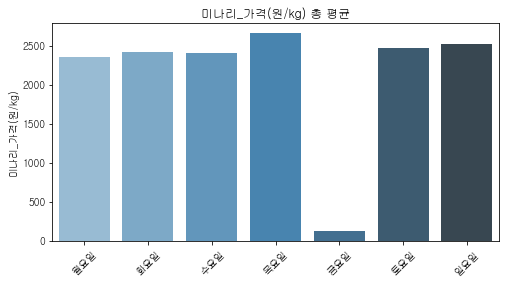

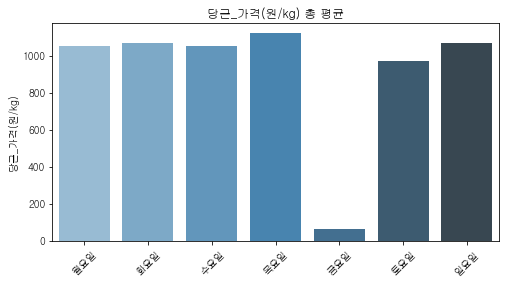

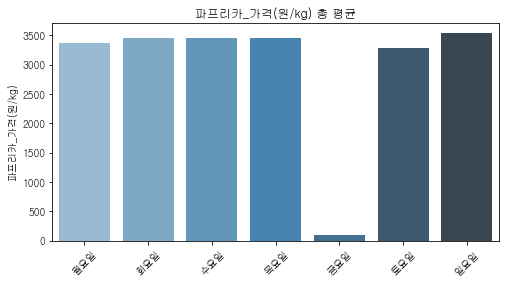

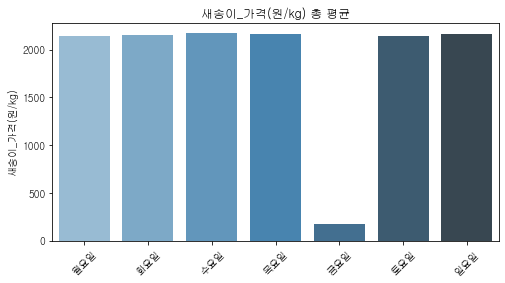

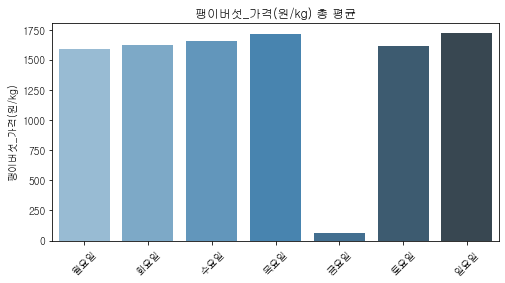

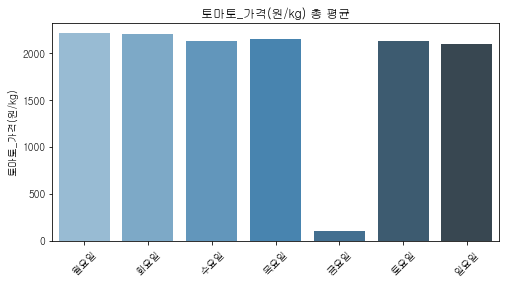

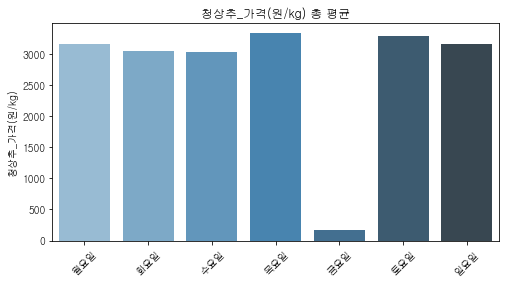

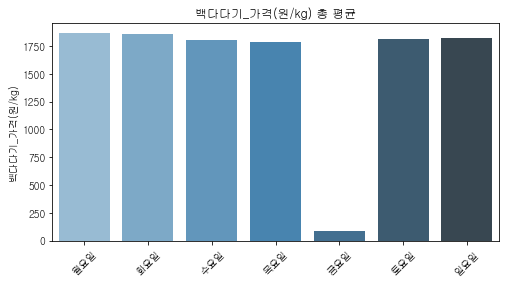

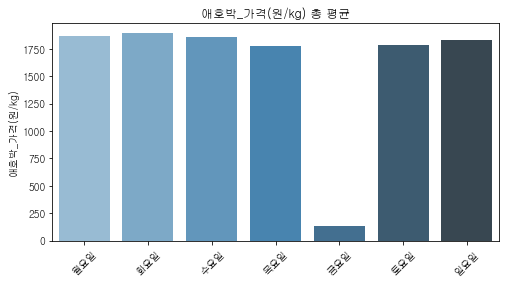

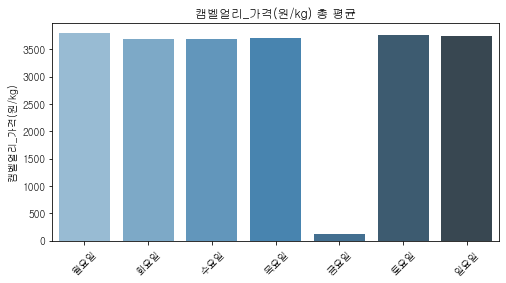

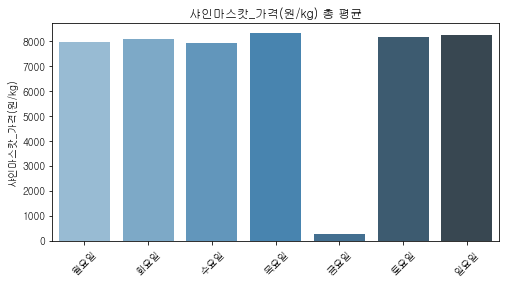

In [21]:
#거래량 평균 요일별 EDA

price_mean = train_price.groupby(['dow']).mean()
day = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
for i in price_mean.columns:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = day, y='%s'%i, data=price_mean ,palette="Blues_d")
    plt.xticks(rotation=45)
    plt.title('%s 총 평균'%i)